**1.Data Import and Library Integration**

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gym
import tensorflow as tf
from sklearn.decomposition import PCA
import xgboost as xgb
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, load_model
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PolynomialMutation
import plotly.graph_objects as go

In [2]:
# upload dataset
file_path = '/Users/keithkumar/Desktop/Masters/Dissertation/machine-learning-eval-2025/matrix_f1f2_200000.csv'
data = pd.read_csv(file_path)
print(data.head())

         y1         y2        x1        x2        x3        x4        x5  \
0  0.656708  24.357051  5.011536  5.059506  4.743333  4.438237  5.356059   
1  0.557390  19.904142  4.901136  4.151602  3.816139  3.321520  3.498959   
2  1.287361  23.704832  4.929365  4.339340  3.732798  3.579553  3.030831   
3  1.009709  10.637035  5.078132  5.734279  6.327788  5.777415  6.639773   
4  0.870716  16.844590  5.062167  5.614021  6.448986  6.968298  6.773324   

         x6        x7        x8  ...        x61        x62        x63  \
0  6.334288  6.409832  6.872777  ...  17.992171  20.328484  43.914312   
1  4.333833  4.545866  4.831633  ...  12.014968  59.712165  33.144265   
2  2.200684  2.816917  2.122569  ...  13.054354  43.106078  54.902696   
3  7.110819  6.281932  5.883480  ...  43.623996  47.210181  14.576346   
4  5.959106  5.232276  5.193678  ...  19.501143  58.172778  58.009102   

         x64        x65        x66        x67        x68        x69        x70  
0  47.363117  29.862704

**2.Model Training, Evaluation, and Optimization Workflow**

In [3]:
### Model1 for y1 ###
# Prepare the data for Model1 (y1)
X = data.drop(columns=['y1', 'y2'])
y1 = data['y1']

# Split the data into training and testing sets for y1
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and Lasso using the specified alpha
pipeline1 = make_pipeline(StandardScaler(), Lasso(alpha=0.0001, max_iter=10000))

# Fit the model on the training data
pipeline1.fit(X_train, y1_train)
model1 = pipeline1

# Predict on the test set for y1
y1_pred = model1.predict(X_test)

# Calculate Mean Squared Error (MSE) and R² on the test set for y1
mse_y1 = mean_squared_error(y1_test, y1_pred)
r2_y1 = r2_score(y1_test, y1_pred)

print("Model1 - y1:")
print("Alpha used:", 0.0001)
print("Mean Squared Error (MSE) on Test Set:", mse_y1)
print("R² Score on Test Set:", r2_y1)

Model1 - y1:
Alpha used: 0.0001
Mean Squared Error (MSE) on Test Set: 0.08993852818659749
R² Score on Test Set: 0.16884113913167886


In [4]:
def plot_actual_vs_predicted(y_true, y_pred, title, xaxis_title, yaxis_title):
    fig = go.Figure()

    # Actual vs. Predicted
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=y_true,
            y=y_pred,
            marker=dict(
                color='rgba(40, 40, 250, 0.3)',
                size=5,
            ),
            name='Actual vs Predicted'
        )
    )

    # Add a 45-degree line to show the perfect prediction
    min_value = min(y_true.min(), y_pred.min())
    max_value = max(y_true.max(), y_pred.max())

    fig.add_trace(
        go.Scatter(
            x=[min_value, max_value],
            y=[min_value, max_value],
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False,
            name='Perfect Prediction Line'
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        width=700,
        height=500,
        xaxis=dict(range=[min_value, max_value]),
        yaxis=dict(range=[min_value, max_value])
    )

    # Show plot
    fig.show()

# Plot for Model1 (y1)
plot_actual_vs_predicted(y1_test, y1_pred, "Actual vs Predicted y1 Values (Model1)", "Actual y1", "Predicted y1")

In [5]:
X = data.drop(columns=['y1', 'y2'])
y2 = data['y2']

# Split the data into training and testing sets for y2
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and Lasso using the specified alpha
pipeline2 = make_pipeline(StandardScaler(), Lasso(alpha=0.0001, max_iter=50000))

# Fit the model on the training data
pipeline2.fit(X_train, y2_train)
model2 = pipeline2

# Predict on the test set for y2
y2_pred = model2.predict(X_test)

# Calculate Mean Squared Error (MSE) and R² on the test set for y2
mse_y2 = mean_squared_error(y2_test, y2_pred)
r2_y2 = r2_score(y2_test, y2_pred)

print("Model2 - y2:")
print("Alpha used:", 0.0001)
print("Mean Squared Error (MSE) on Test Set:", mse_y2)
print("R² Score on Test Set:", r2_y2)

Model2 - y2:
Alpha used: 0.0001
Mean Squared Error (MSE) on Test Set: 15.479341312469549
R² Score on Test Set: 0.018430916784450524


In [6]:
def plot_actual_vs_predicted(y_true, y_pred, title, xaxis_title, yaxis_title):
    fig = go.Figure()

    # Actual vs. Predicted
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=y_true,
            y=y_pred,
            marker=dict(
                color='rgba(40, 40, 250, 0.3)',
                size=5,
            ),
            name='Actual vs Predicted'
        )
    )

    # Add a 45-degree line to show the perfect prediction
    min_value = min(y_true.min(), y_pred.min())
    max_value = max(y_true.max(), y_pred.max())

    fig.add_trace(
        go.Scatter(
            x=[min_value, max_value],
            y=[min_value, max_value],
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False,
            name='Perfect Prediction Line'
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        width=700,
        height=500,
        xaxis=dict(range=[min_value, max_value]),
        yaxis=dict(range=[min_value, max_value])
    )

    # Show plot
    fig.show()

# Plot for Model2 (y2)
plot_actual_vs_predicted(y2_test, y2_pred, "Actual vs Predicted y2 Values (Model2)", "Actual y2", "Predicted y2")

In [7]:
#XGBoost Model3
X = data.drop(columns=['y1', 'y2'])
y1 = data['y1']

# Split the data into training and testing sets for y1
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Define the XGBoost regressor with L1 regularization (alpha) for model3
model3 = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=0.5,  # L1 regularization parameter
    random_state=42
)

# Fit the model on the training data for y1
model3.fit(X_train, y1_train)

# Evaluate on the test set for y1
y1_pred = model3.predict(X_test)
test_mse_y1 = mean_squared_error(y1_test, y1_pred)
r2_y1 = r2_score(y1_test, y1_pred)

print("Test MSE:", test_mse_y1)

Test MSE: 0.035006240539457195


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      6 |             - |             -
     2 |      200 |      8 |  0.0456930043 |         ideal
     3 |      300 |      9 |  0.2327752886 |         ideal
     4 |      400 |     12 |  0.1501414032 |         ideal
     5 |      500 |     14 |  0.2128632883 |         ideal
     6 |      600 |     15 |  0.0005492365 |             f
     7 |      700 |     16 |  0.0126002424 |             f
     8 |      800 |     16 |  0.0030120830 |             f
     9 |      900 |     19 |  0.0347376936 |         ideal
    10 |     1000 |     20 |  0.0018604485 |             f
    11 |     1100 |     20 |  0.0018604485 |             f
    12 |     1200 |     20 |  0.0018604485 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    13 |     1300 |     21 |  0.0024426500 |             f
    14 |     1400 |     18 |  0.0078690989 |             f
    15 |     1500 |     18 |  0.000000E+00 |             f
    16 |     1600 |     18 |  0.000000E+00 |             f
    17 |     1700 |     15 |  0.0082433429 |             f
    18 |     1800 |     18 |  0.0642411054 |         ideal
    19 |     1900 |     19 |  0.0205292577 |         ideal
    20 |     2000 |     19 |  0.000000E+00 |             f
    21 |     2100 |     19 |  0.0021888049 |             f
    22 |     2200 |     19 |  0.0042552409 |             f
    23 |     2300 |     19 |  0.000000E+00 |             f
    24 |     2400 |     19 |  0.000000E+00 |             f
    25 |     2500 |     19 |  0.000000E+00 |             f
    26 |     2600 |     19 |  0.000000E+00 |             f
    27 |     2700 |     20 |  0.0022805571 |             f
    28 |     2800 |     20 |  0.0022805571 |             f
    29 |     2900 |     21 |  0.0035163896 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    36 |     3600 |     26 |  0.000000E+00 |             f
    37 |     3700 |     27 |  0.0024090089 |             f
    38 |     3800 |     28 |  0.0040295482 |             f
    39 |     3900 |     29 |  0.0008685713 |             f
    40 |     4000 |     29 |  0.0008685713 |             f
    41 |     4100 |     29 |  0.0008685713 |             f
    42 |     4200 |     29 |  0.0008685713 |             f
    43 |     4300 |     29 |  0.0008685713 |             f
    44 |     4400 |     29 |  0.0011858253 |             f
    45 |     4500 |     27 |  0.0034614614 |         ideal
    46 |     4600 |     27 |  0.000000E+00 |             f
    47 |     4700 |     28 |  0.1024017589 |         nadir
    48 |     4800 |     28 |  0.000000E+00 |             f
    49 |     4900 |     28 |  0.000000E+00 |             f
    50 |     5000 |     28 |  0.000000E+00 |             f
    51 |     5100 |     28 |  0.000000E+00 |             f
    52 |     5200 |     28 |  0.000000E+00 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    59 |     5900 |     28 |  0.000000E+00 |             f
    60 |     6000 |     28 |  0.000000E+00 |             f
    61 |     6100 |     28 |  0.000000E+00 |             f
    62 |     6200 |     28 |  0.0084249875 |         ideal
    63 |     6300 |     28 |  0.000000E+00 |             f
    64 |     6400 |     28 |  0.000000E+00 |             f
    65 |     6500 |     28 |  0.000000E+00 |             f
    66 |     6600 |     28 |  0.0318206578 |         ideal
    67 |     6700 |     28 |  0.000000E+00 |             f
    68 |     6800 |     30 |  0.0018180894 |             f
    69 |     6900 |     31 |  0.0042833509 |             f
    70 |     7000 |     31 |  0.000000E+00 |             f
    71 |     7100 |     29 |  0.0010396244 |             f
    72 |     7200 |     29 |  0.0010396244 |             f
    73 |     7300 |     29 |  0.0010396244 |             f
    74 |     7400 |     29 |  0.0019382959 |             f
    75 |     7500 |     29 |  0.0019382959 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    82 |     8200 |     30 |  0.000000E+00 |             f
    83 |     8300 |     31 |  0.0005728069 |             f
    84 |     8400 |     32 |  0.0010457037 |             f
    85 |     8500 |     29 |  0.0077168009 |             f
    86 |     8600 |     29 |  0.000000E+00 |             f
    87 |     8700 |     30 |  0.0004410492 |             f
    88 |     8800 |     30 |  0.0004410492 |             f
    89 |     8900 |     30 |  0.0004410492 |             f
    90 |     9000 |     30 |  0.0012929768 |             f
    91 |     9100 |     36 |  0.0064587164 |             f
    92 |     9200 |     36 |  0.0042941793 |             f
    93 |     9300 |     36 |  0.000000E+00 |             f
    94 |     9400 |     36 |  0.000000E+00 |             f
    95 |     9500 |     36 |  0.000000E+00 |             f
    96 |     9600 |     36 |  0.000000E+00 |             f
    97 |     9700 |     36 |  0.0001758694 |             f
    98 |     9800 |     36 |  0.0001758694 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

     5 |      500 |      8 |  0.000000E+00 |             f
     6 |      600 |      8 |  0.000000E+00 |             f
     7 |      700 |      8 |  0.000000E+00 |             f
     8 |      800 |      9 |  0.0343685118 |         ideal
     9 |      900 |     11 |  0.1302757223 |         ideal
    10 |     1000 |     13 |  0.0148148678 |         ideal
    11 |     1100 |     14 |  0.0696954394 |         ideal
    12 |     1200 |     16 |  0.0056793909 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    13 |     1300 |     17 |  0.0008384309 |             f
    14 |     1400 |     18 |  0.0112000998 |             f
    15 |     1500 |     17 |  0.0087188373 |             f
    16 |     1600 |     16 |  0.2053148611 |         nadir
    17 |     1700 |     17 |  0.0048583658 |             f
    18 |     1800 |     17 |  0.0020523012 |             f
    19 |     1900 |     18 |  0.0036267332 |             f
    20 |     2000 |     18 |  0.000000E+00 |             f
    21 |     2100 |     18 |  0.000000E+00 |             f
    22 |     2200 |     18 |  0.000000E+00 |             f
    23 |     2300 |     18 |  0.000000E+00 |             f
    24 |     2400 |     20 |  0.0043200834 |             f
    25 |     2500 |     20 |  0.000000E+00 |             f
    26 |     2600 |     19 |  0.0014928076 |             f
    27 |     2700 |     19 |  0.0014928076 |             f
    28 |     2800 |     19 |  0.0014928076 |             f
    29 |     2900 |     19 |  0.0014928076 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    36 |     3600 |     21 |  0.0015106910 |             f
    37 |     3700 |     21 |  0.0015106910 |             f
    38 |     3800 |     21 |  0.0015106910 |             f
    39 |     3900 |     21 |  0.0015106910 |             f
    40 |     4000 |     22 |  0.0021425033 |             f
    41 |     4100 |     22 |  0.0021425033 |             f
    42 |     4200 |     23 |  0.0024491833 |             f
    43 |     4300 |     23 |  0.0025819009 |             f
    44 |     4400 |     23 |  0.000000E+00 |             f
    45 |     4500 |     23 |  0.000000E+00 |             f
    46 |     4600 |     23 |  0.000000E+00 |             f
    47 |     4700 |     24 |  0.0012466000 |             f
    48 |     4800 |     24 |  0.0012466000 |             f
    49 |     4900 |     24 |  0.0012466000 |             f
    50 |     5000 |     25 |  0.0027071463 |             f
    51 |     5100 |     25 |  0.000000E+00 |             f
    52 |     5200 |     25 |  0.000000E+00 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    59 |     5900 |     25 |  0.000000E+00 |             f
    60 |     6000 |     26 |  0.0006341205 |             f
    61 |     6100 |     26 |  0.0006341205 |             f
    62 |     6200 |     26 |  0.0006341205 |             f
    63 |     6300 |     26 |  0.0006341205 |             f
    64 |     6400 |     26 |  0.0006341205 |             f
    65 |     6500 |     26 |  0.0006341205 |             f
    66 |     6600 |     26 |  0.0006341205 |             f
    67 |     6700 |     26 |  0.0006341205 |             f
    68 |     6800 |     26 |  0.0006341205 |             f
    69 |     6900 |     26 |  0.0006341205 |             f
    70 |     7000 |     26 |  0.0006341205 |             f
    71 |     7100 |     26 |  0.0006341205 |             f
    72 |     7200 |     26 |  0.0006341205 |             f
    73 |     7300 |     26 |  0.0006341205 |             f
    74 |     7400 |     26 |  0.0006341205 |             f
    75 |     7500 |     26 |  0.0006341205 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    82 |     8200 |     27 |  0.0007044046 |             f
    83 |     8300 |     27 |  0.0007044046 |             f
    84 |     8400 |     27 |  0.0007044046 |             f
    85 |     8500 |     28 |  0.0021498623 |             f
    86 |     8600 |     28 |  0.0021498623 |             f
    87 |     8700 |     28 |  0.0021498623 |             f
    88 |     8800 |     29 |  0.0029819805 |             f
    89 |     8900 |     29 |  0.0021296522 |             f
    90 |     9000 |     29 |  0.0021296522 |             f
    91 |     9100 |     29 |  0.0021296522 |             f
    92 |     9200 |     29 |  0.0021296522 |             f
    93 |     9300 |     30 |  0.0033681307 |             f
    94 |     9400 |     30 |  0.000000E+00 |             f
    95 |     9500 |     31 |  0.0005973672 |             f
    96 |     9600 |     31 |  0.0005973672 |             f
    97 |     9700 |     31 |  0.0005973672 |             f
    98 |     9800 |     31 |  0.0005973672 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

     4 |      400 |     13 |  0.0813109732 |         ideal
     5 |      500 |     11 |  0.0229914011 |             f
     6 |      600 |     12 |  0.1486711918 |         ideal
     7 |      700 |     15 |  0.0156456589 |             f
     8 |      800 |     18 |  0.0078847837 |             f
     9 |      900 |     18 |  0.0102463281 |             f
    10 |     1000 |     21 |  0.0088465799 |             f
    11 |     1100 |     23 |  0.0050983872 |         ideal
    12 |     1200 |     23 |  0.000000E+00 |             f
    13 |     1300 |     24 |  0.0025596447 |             f
    14 |     1400 |     24 |  0.0184422602 |         ideal
    15 |     1500 |     23 |  0.0199355198 |         ideal
    16 |     1600 |     22 |  0.0208020324 |         ideal
    17 |     1700 |     23 |  0.0338848369 |         ideal
    18 |     1800 |     24 |  0.0654011866 |         ideal
    19 |     1900 |     25 |  0.0433398983 |         ideal
    20 |     2000 |     25 |  0.0005432938 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    28 |     2800 |     27 |  0.0032080526 |             f
    29 |     2900 |     27 |  0.000000E+00 |             f
    30 |     3000 |     28 |  0.0009277482 |             f
    31 |     3100 |     28 |  0.0009277482 |             f
    32 |     3200 |     28 |  0.0009277482 |             f
    33 |     3300 |     28 |  0.0009277482 |             f
    34 |     3400 |     28 |  0.0009277482 |             f
    35 |     3500 |     28 |  0.0009277482 |             f
    36 |     3600 |     28 |  0.0009277482 |             f
    37 |     3700 |     29 |  0.0014142544 |             f
    38 |     3800 |     29 |  0.0014142544 |             f
    39 |     3900 |     30 |  0.0020529315 |             f
    40 |     4000 |     30 |  0.0020529315 |             f
    41 |     4100 |     30 |  0.0020529315 |             f
    42 |     4200 |     30 |  0.0020529315 |             f
    43 |     4300 |     31 |  0.0025735642 |             f
    44 |     4400 |     32 |  0.0009367932 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    48 |     4800 |     34 |  0.0018704399 |             f
    49 |     4900 |     31 |  0.0025683303 |             f
    50 |     5000 |     31 |  0.000000E+00 |             f
    51 |     5100 |     31 |  0.000000E+00 |             f
    52 |     5200 |     31 |  0.000000E+00 |             f
    53 |     5300 |     31 |  0.000000E+00 |             f
    54 |     5400 |     31 |  0.000000E+00 |             f
    55 |     5500 |     31 |  0.000000E+00 |             f
    56 |     5600 |     31 |  0.0007070809 |             f
    57 |     5700 |     31 |  0.0007070809 |             f
    58 |     5800 |     31 |  0.0007070809 |             f
    59 |     5900 |     31 |  0.0011760382 |             f
    60 |     6000 |     31 |  0.0011760382 |             f
    61 |     6100 |     31 |  0.0011760382 |             f
    62 |     6200 |     31 |  0.0011760382 |             f
    63 |     6300 |     30 |  0.0023712968 |             f
    64 |     6400 |     30 |  0.0023712968 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    72 |     7200 |     35 |  0.0028733826 |             f
    73 |     7300 |     33 |  0.0005917824 |             f
    74 |     7400 |     34 |  0.0010153839 |             f
    75 |     7500 |     34 |  0.0010153839 |             f
    76 |     7600 |     31 |  0.0019788579 |             f
    77 |     7700 |     31 |  0.0019788579 |             f
    78 |     7800 |     31 |  0.0019788579 |             f
    79 |     7900 |     32 |  0.0019302353 |             f
    80 |     8000 |     32 |  0.0019302353 |             f
    81 |     8100 |     32 |  0.0019302353 |             f
    82 |     8200 |     32 |  0.0019302353 |             f
    83 |     8300 |     31 |  0.0024094127 |             f
    84 |     8400 |     32 |  0.0024414015 |             f
    85 |     8500 |     34 |  0.0035088852 |             f
    86 |     8600 |     34 |  0.000000E+00 |             f
    87 |     8700 |     33 |  0.0010674228 |             f
    88 |     8800 |     34 |  0.0013522456 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    96 |     9600 |     40 |  0.0011419183 |             f
    97 |     9700 |     41 |  0.0014263757 |             f
    98 |     9800 |     41 |  0.0035665864 |             f
    99 |     9900 |     41 |  0.000000E+00 |             f
   100 |    10000 |     41 |  0.000000E+00 |             f
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      7 |             - |             -
     2 |      200 |     10 |  0.0834754952 |         ideal
     3 |      300 |     10 |  0.1108410238 |         ideal
     4 |      400 |      9 |  0.0136860489 |             f
     5 |      500 |     10 |  0.0321892720 |             f
     6 |      600 |     11 |  0.0900180211 |         ideal
     7 |      700 |     10 |  0.0108281609 |             f
     8 |      800 |     12 |  0.0097018187 |         ideal
     9 |      900 |     11 |  0.1064632596 |         ideal
    10 |     1000 |     13 |  0.0260512131 |             f
    11 |     1100 |     13 |  0.2776500942 |         nad

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    18 |     1800 |     17 |  0.0057362919 |             f
    19 |     1900 |     17 |  0.000000E+00 |             f
    20 |     2000 |     17 |  0.000000E+00 |             f
    21 |     2100 |     17 |  0.000000E+00 |             f
    22 |     2200 |     17 |  0.000000E+00 |             f
    23 |     2300 |     17 |  0.000000E+00 |             f
    24 |     2400 |     17 |  0.000000E+00 |             f
    25 |     2500 |     17 |  0.000000E+00 |             f
    26 |     2600 |     17 |  0.000000E+00 |             f
    27 |     2700 |     17 |  0.000000E+00 |             f
    28 |     2800 |     17 |  0.0021363396 |             f
    29 |     2900 |     17 |  0.0021363396 |             f
    30 |     3000 |     17 |  0.0021363396 |             f
    31 |     3100 |     17 |  0.0021363396 |             f
    32 |     3200 |     18 |  0.0095401650 |         ideal
    33 |     3300 |     19 |  0.0023780565 |             f
    34 |     3400 |     20 |  0.0036884560 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    40 |     4000 |     18 |  0.0013054093 |             f
    41 |     4100 |     18 |  0.0013054093 |             f
    42 |     4200 |     18 |  0.0013054093 |             f
    43 |     4300 |     18 |  0.0013054093 |             f
    44 |     4400 |     18 |  0.0013054093 |             f
    45 |     4500 |     18 |  0.0013054093 |             f
    46 |     4600 |     18 |  0.0013054093 |             f
    47 |     4700 |     18 |  0.0013054093 |             f
    48 |     4800 |     18 |  0.0013054093 |             f
    49 |     4900 |     18 |  0.0013054093 |             f
    50 |     5000 |     18 |  0.0013054093 |             f
    51 |     5100 |     18 |  0.0013054093 |             f
    52 |     5200 |     18 |  0.0013054093 |             f
    53 |     5300 |     19 |  0.0039120471 |             f
    54 |     5400 |     19 |  0.000000E+00 |             f
    55 |     5500 |     19 |  0.000000E+00 |             f
    56 |     5600 |     19 |  0.000000E+00 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    62 |     6200 |     19 |  0.000000E+00 |             f
    63 |     6300 |     19 |  0.000000E+00 |             f
    64 |     6400 |     19 |  0.000000E+00 |             f
    65 |     6500 |     19 |  0.000000E+00 |             f
    66 |     6600 |     19 |  0.000000E+00 |             f
    67 |     6700 |     19 |  0.000000E+00 |             f
    68 |     6800 |     19 |  0.000000E+00 |             f
    69 |     6900 |     19 |  0.000000E+00 |             f
    70 |     7000 |     19 |  0.000000E+00 |             f
    71 |     7100 |     19 |  0.000000E+00 |             f
    72 |     7200 |     19 |  0.000000E+00 |             f
    73 |     7300 |     19 |  0.000000E+00 |             f
    74 |     7400 |     19 |  0.000000E+00 |             f
    75 |     7500 |     19 |  0.000000E+00 |             f
    76 |     7600 |     19 |  0.000000E+00 |             f
    77 |     7700 |     19 |  0.000000E+00 |             f
    78 |     7800 |     19 |  0.000000E+00 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    85 |     8500 |     19 |  0.000000E+00 |             f
    86 |     8600 |     19 |  0.000000E+00 |             f
    87 |     8700 |     19 |  0.000000E+00 |             f
    88 |     8800 |     19 |  0.000000E+00 |             f
    89 |     8900 |     19 |  0.000000E+00 |             f
    90 |     9000 |     19 |  0.000000E+00 |             f
    91 |     9100 |     19 |  0.000000E+00 |             f
    92 |     9200 |     19 |  0.000000E+00 |             f
    93 |     9300 |     19 |  0.000000E+00 |             f
    94 |     9400 |     19 |  0.000000E+00 |             f
    95 |     9500 |     19 |  0.000000E+00 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    96 |     9600 |     19 |  0.000000E+00 |             f
    97 |     9700 |     19 |  0.000000E+00 |             f
    98 |     9800 |     19 |  0.000000E+00 |             f
    99 |     9900 |     19 |  0.000000E+00 |             f
   100 |    10000 |     19 |  0.000000E+00 |             f
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      6 |             - |             -
     2 |      200 |      6 |  0.0081137925 |         ideal
     3 |      300 |      8 |  0.0311707592 |         ideal
     4 |      400 |     10 |  0.1849664496 |         ideal
     5 |      500 |     12 |  0.0131891849 |             f
     6 |      600 |     13 |  0.0050926565 |             f
     7 |      700 |     12 |  0.0196808774 |             f
     8 |      800 |     12 |  0.000000E+00 |             f
     9 |      900 |     13 |  0.0410612456 |         ideal
    10 |     1000 |     13 |  0.000000E+00 |             f
    11 |     1100 |     13 |  0.0638868604 |         ide

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    18 |     1800 |     18 |  0.000000E+00 |             f
    19 |     1900 |     18 |  0.000000E+00 |             f
    20 |     2000 |     18 |  0.000000E+00 |             f
    21 |     2100 |     18 |  0.000000E+00 |             f
    22 |     2200 |     18 |  0.000000E+00 |             f
    23 |     2300 |     18 |  0.000000E+00 |             f
    24 |     2400 |     19 |  0.0024524536 |             f
    25 |     2500 |     20 |  0.0049280824 |             f
    26 |     2600 |     22 |  0.0776865896 |         ideal
    27 |     2700 |     22 |  0.000000E+00 |             f
    28 |     2800 |     22 |  0.000000E+00 |             f
    29 |     2900 |     22 |  0.000000E+00 |             f
    30 |     3000 |     22 |  0.000000E+00 |             f
    31 |     3100 |     22 |  0.0008882368 |             f
    32 |     3200 |     23 |  0.0027803363 |             f
    33 |     3300 |     23 |  0.000000E+00 |             f
    34 |     3400 |     23 |  0.000000E+00 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    41 |     4100 |     24 |  0.0012082669 |             f
    42 |     4200 |     24 |  0.0012082669 |             f
    43 |     4300 |     24 |  0.0016952728 |             f
    44 |     4400 |     24 |  0.0016952728 |             f
    45 |     4500 |     24 |  0.0016952728 |             f
    46 |     4600 |     24 |  0.0016952728 |             f
    47 |     4700 |     24 |  0.0016952728 |             f
    48 |     4800 |     24 |  0.0016952728 |             f
    49 |     4900 |     24 |  0.0016952728 |             f
    50 |     5000 |     25 |  0.0049666773 |             f
    51 |     5100 |     27 |  0.0020664881 |             f
    52 |     5200 |     28 |  0.0037738614 |             f
    53 |     5300 |     28 |  0.000000E+00 |             f
    54 |     5400 |     28 |  0.000000E+00 |             f
    55 |     5500 |     28 |  0.0145985107 |         ideal
    56 |     5600 |     28 |  0.0006286690 |             f
    57 |     5700 |     28 |  0.0006286690 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    65 |     6500 |     30 |  0.0022005892 |             f
    66 |     6600 |     30 |  0.0022005892 |             f
    67 |     6700 |     30 |  0.0022005892 |             f
    68 |     6800 |     30 |  0.0022005892 |             f
    69 |     6900 |     30 |  0.0022005892 |             f
    70 |     7000 |     30 |  0.0022005892 |             f
    71 |     7100 |     31 |  0.0027407698 |             f
    72 |     7200 |     31 |  0.0009248063 |             f
    73 |     7300 |     31 |  0.0009248063 |             f
    74 |     7400 |     31 |  0.0009248063 |             f
    75 |     7500 |     31 |  0.0009248063 |             f
    76 |     7600 |     32 |  0.0013439605 |             f
    77 |     7700 |     32 |  0.0013439605 |             f
    78 |     7800 |     32 |  0.0013439605 |             f
    79 |     7900 |     32 |  0.0013439605 |             f
    80 |     8000 |     32 |  0.0013439605 |             f
    81 |     8100 |     32 |  0.0013439605 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    88 |     8800 |     34 |  0.0028858476 |             f
    89 |     8900 |     35 |  0.0002540006 |             f
    90 |     9000 |     35 |  0.0002540006 |             f
    91 |     9100 |     35 |  0.0006156146 |             f
    92 |     9200 |     35 |  0.0006156146 |             f
    93 |     9300 |     35 |  0.0006156146 |             f
    94 |     9400 |     33 |  0.0017899544 |             f
    95 |     9500 |     33 |  0.0017899544 |             f
    96 |     9600 |     33 |  0.0031417199 |             f
    97 |     9700 |     33 |  0.000000E+00 |             f
    98 |     9800 |     33 |  0.0008277028 |             f
    99 |     9900 |     33 |  0.0008277028 |             f
   100 |    10000 |     33 |  0.0008277028 |             f


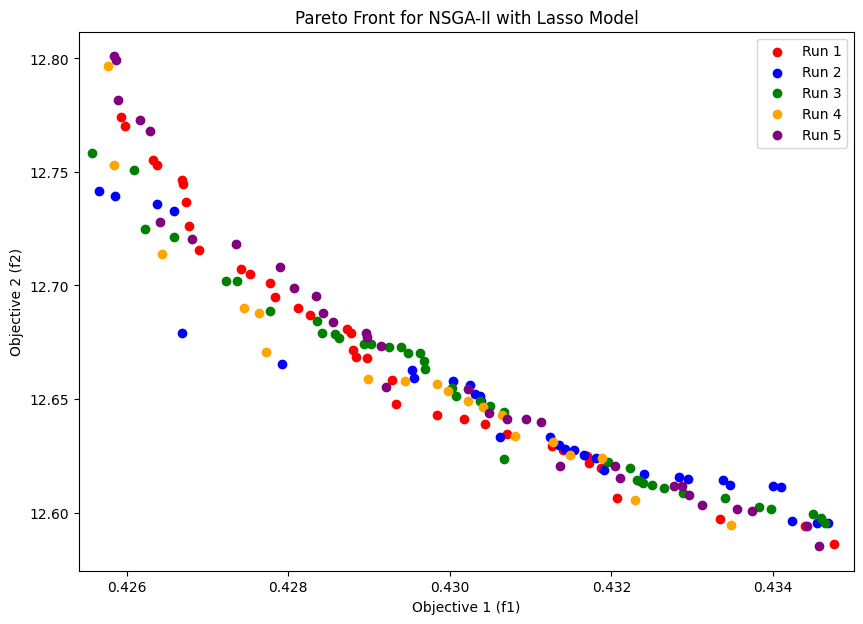

In [8]:
# Extract the initial values from row 14 for columns X1-X50
initial_values = data.iloc[13, 2:52].values  # Extracting X1-X50 from row 14

# Define the optimization problem
class F1F2Problem(Problem):
    def __init__(self, model_y1, model_y2, initial_values):
        n_var = 70  # Total number of features
        xl_x1_x50 = initial_values  # Fix X1-X50
        xu_x1_x50 = initial_values  # Fix X1-X50

        # Define the range for X51-X70 (10 to 49)
        xl_x51_x70 = np.full(20, 10)
        xu_x51_x70 = np.full(20, 49)

        # Combine all the variable bounds
        xl = np.concatenate((xl_x1_x50, xl_x51_x70))
        xu = np.concatenate((xu_x1_x50, xu_x51_x70))

        super().__init__(n_var=n_var, n_obj=2, n_constr=0, xl=xl, xu=xu)
        self.model_y1 = model_y1
        self.model_y2 = model_y2

    def _evaluate(self, X, out, *args, **kwargs):
        # Scale the input data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        # Predict F1 and F2 using the trained Lasso models
        f1 = self.model_y1.predict(X_scaled)
        f2 = self.model_y2.predict(X_scaled)
        out["F"] = np.column_stack([f1, f2])

# Create the problem instance for model1 and model2
problem = F1F2Problem(model_y1=model1, model_y2=model2, initial_values=initial_values)

# Define the algorithm with updated parameters
algorithm = NSGA2(
    pop_size=100,  # Population size
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.95, eta=10),  # Crossover probability and eta
    mutation=PolynomialMutation(prob=0.25, eta=25)  # Mutation rate
)

# Set up colors for the different runs
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Set a fixed seed for all runs to make them identical
fixed_seed = 42

# Create a figure for the combined plot
plt.figure(figsize=(10, 7))

# Loop to run the optimization 5 times and plot the Pareto fronts in different colors
for i in range(5):
    # Execute the optimization with the fixed seed
    res = minimize(problem, algorithm, ('n_gen', 100), seed=fixed_seed + i, save_history=True, verbose=True)

    # Plot the Pareto Frontier for this run in a different color
    plt.scatter(res.F[:, 0], res.F[:, 1], color=colors[i], label=f'Run {i+1}')

# Calculate the min and max values for f1 and f2 across all runs
f1_min, f1_max = res.F[:, 0].min(), res.F[:, 0].max()
f2_min, f2_max = res.F[:, 1].min(), res.F[:, 1].max()

# Add some padding for better visualization
f1_range = f1_max - f1_min
f2_range = f2_max - f2_min

plt.xlim(f1_min - 0.05 * f1_range, f1_max + 0.05 * f1_range)  # Set the range for f1 on the x-axis
plt.ylim(f2_min - 0.05 * f2_range, f2_max + 0.05 * f2_range)  # Set the range for f2 on the y-axis

# Add labels and legend
plt.xlabel('Objective 1 (f1)')
plt.ylabel('Objective 2 (f2)')
plt.title('Pareto Front for NSGA-II with Lasso Model')
plt.legend()

# Show the plot
plt.show()

In [9]:
# Plot for Model3 (y1)
def plot_actual_vs_predicted(y_true, y_pred, title, xaxis_title, yaxis_title):
    fig = go.Figure()

    # Actual vs. Predicted
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=y_true,
            y=y_pred,
            marker=dict(
                color='rgba(40, 40, 250, 0.3)',
                size=5,
            ),
            name='Actual vs Predicted'
        )
    )

    # Add a 45-degree line to show the perfect prediction
    min_value = min(y_true.min(), y_pred.min())
    max_value = max(y_true.max(), y_pred.max())

    fig.add_trace(
        go.Scatter(
            x=[min_value, max_value],
            y=[min_value, max_value],
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False,
            name='Perfect Prediction Line'
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        width=700,
        height=500,
        xaxis=dict(range=[min_value, max_value]),
        yaxis=dict(range=[min_value, max_value])
    )

    # Show plot
    fig.show()

# Plot the predicted vs actual values for y1 (Model3)
plot_actual_vs_predicted(y1_test, y1_pred, "Actual vs Predicted y1 Values (Model3)", "Actual y1", "Predicted y1")

In [10]:
X = data.drop(columns=['y1', 'y2'])
y2 = data['y2']

# Split the data into training and testing sets for y2
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Define the XGBoost regressor with L1 regularization (alpha) for model4
model4 = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=0.5,  # L1 regularization parameter
    random_state=42
)

# Fit the model on the training data for y2
model4.fit(X_train, y2_train)

# Evaluate on the test set for y2
y2_pred = model4.predict(X_test)
test_mse_y2 = mean_squared_error(y2_test, y2_pred)
r2_y2 = r2_score(y2_test, y2_pred)

print("Test MSE:", test_mse_y2)

Test MSE: 4.8968778712712195


In [11]:
# Plot for Model4 (y2)
def plot_actual_vs_predicted(y_true, y_pred, title, xaxis_title, yaxis_title):
    fig = go.Figure()

    # Actual vs. Predicted
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=y_true,
            y=y_pred,
            marker=dict(
                color='rgba(40, 40, 250, 0.3)',
                size=5,
            ),
            name='Actual vs Predicted'
        )
    )

    # Add a 45-degree line to show the perfect prediction
    min_value = min(y_true.min(), y_pred.min())
    max_value = max(y_true.max(), y_pred.max())

    fig.add_trace(
        go.Scatter(
            x=[min_value, max_value],
            y=[min_value, max_value],
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False,
            name='Perfect Prediction Line'
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        width=700,
        height=500,
        xaxis=dict(range=[min_value, max_value]),
        yaxis=dict(range=[min_value, max_value])
    )

    # Show plot
    fig.show()

# Plot the predicted vs actual values for y2 (Model4)
plot_actual_vs_predicted(y2_test, y2_pred, "Actual vs Predicted y2 Values (Model4)", "Actual y2", "Predicted y2")

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |    100 |             - |             -
     2 |      200 |    100 |  0.000000E+00 |             f
     3 |      300 |    100 |  0.000000E+00 |             f
     4 |      400 |    100 |  0.000000E+00 |             f
     5 |      500 |    100 |  0.000000E+00 |             f
     6 |      600 |    100 |  0.000000E+00 |             f
     7 |      700 |    100 |  0.000000E+00 |             f
     8 |      800 |    100 |  0.000000E+00 |             f
     9 |      900 |    100 |  0.000000E+00 |             f
    10 |     1000 |    100 |  0.000000E+00 |             f
    11 |     1100 |    100 |  0.000000E+00 |             f
    12 |     1200 |    100 |  0.000000E+00 |             f
    13 |     1300 |    100 |  0.000000E+00 |             f
    14 |     1400 |    100 |  0.000000E+00 |             f
    15 |     1500 |    100 |  0.000000E+00 |             f
    16 |     1600 |    100 |  0.000000E+00 |            

/var/folders/gx/j5mlrwx101sggjptt_v7g6sw0000gn/T/ipykernel_41412/2464259688.py:68: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

/var/folders/gx/j5mlrwx101sggjptt_v7g6sw0000gn/T/ipykernel_41412/2464259688.py:69: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



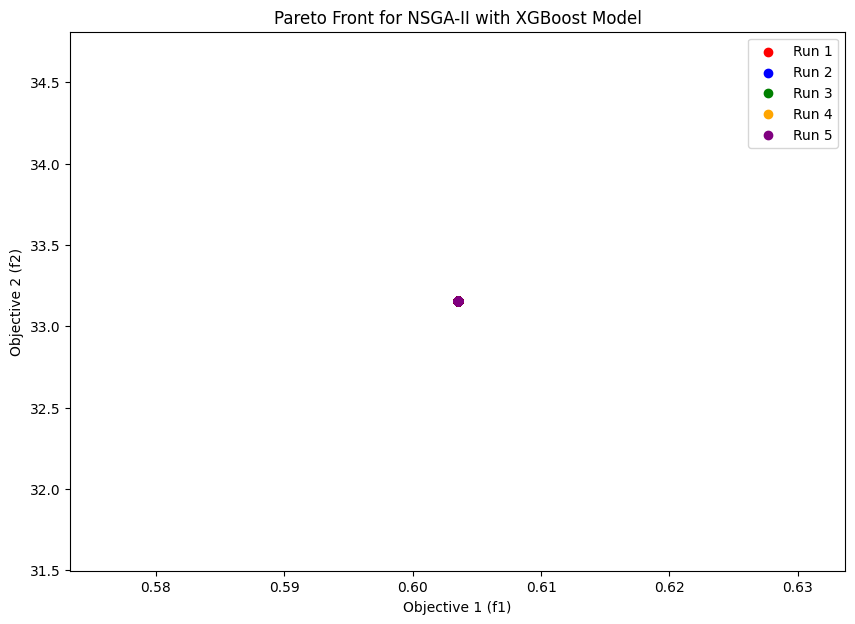

In [12]:
# Extract the initial values from row 14 for columns X1-X50
initial_values = data.iloc[13, 2:52].values  # Extracting X1-X50 from row 14

# Define the optimization problem
class F1F2Problem(Problem):
    def __init__(self, model_y1, model_y2, initial_values):
        n_var = 70  # Total number of features
        xl_x1_x50 = initial_values  # Fix X1-X50
        xu_x1_x50 = initial_values  # Fix X1-X50

        # Define the range for X51-X70 (10 to 49)
        xl_x51_x70 = np.full(20, 10)
        xu_x51_x70 = np.full(20, 49)

        # Combine all the variable bounds
        xl = np.concatenate((xl_x1_x50, xl_x51_x70))
        xu = np.concatenate((xu_x1_x50, xu_x51_x70))

        super().__init__(n_var=n_var, n_obj=2, n_constr=0, xl=xl, xu=xu)
        self.model_y1 = model_y1
        self.model_y2 = model_y2

    def _evaluate(self, X, out, *args, **kwargs):
        # Scale the input data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        # Predict F1 and F2 using the trained models
        f1 = self.model_y1.predict(X_scaled)
        f2 = self.model_y2.predict(X_scaled)
        out["F"] = np.column_stack([f1, f2])

# Create the problem instance for model3 and model4
problem = F1F2Problem(model_y1=model3, model_y2=model4, initial_values=initial_values)

# Define the algorithm with updated parameters
algorithm = NSGA2(
    pop_size=100,  # Population size
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.95, eta=10),  # Crossover probability and eta
    mutation=PolynomialMutation(prob=0.25, eta=25)  # Mutation rate
)

# Set up colors for the different runs
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Set a fixed seed for all runs to make them identical
fixed_seed = 42

# Create a figure for the combined plot
plt.figure(figsize=(10, 7))

# Loop to run the optimization 5 times and plot the Pareto fronts in different colors
for i in range(5):
    # Execute the optimization with the fixed seed
    res = minimize(problem, algorithm, ('n_gen', 100), seed=fixed_seed + i, save_history=True, verbose=True)

    # Plot the Pareto Frontier for this run in a different color
    plt.scatter(res.F[:, 0], res.F[:, 1], color=colors[i], label=f'Run {i+1}')

# Calculate the min and max values for f1 and f2 across all runs
f1_min, f1_max = res.F[:, 0].min(), res.F[:, 0].max()
f2_min, f2_max = res.F[:, 1].min(), res.F[:, 1].max()

# Add some padding for better visualization
f1_range = f1_max - f1_min
f2_range = f2_max - f2_min

plt.xlim(f1_min - 0.05 * f1_range, f1_max + 0.05 * f1_range)  # Set the range for f1 on the x-axis
plt.ylim(f2_min - 0.05 * f2_range, f2_max + 0.05 * f2_range)  # Set the range for f2 on the y-axis

# Add labels and legend
plt.xlabel('Objective 1 (f1)')
plt.ylabel('Objective 2 (f2)')
plt.title('Pareto Front for NSGA-II with XGBoost Model')
plt.legend()

# Show the plot
plt.show()

In [13]:
# Prepare the data for y1:64/32:0.019(PCA:0.022); 32:0.022; 128/64/32:0.031;
# MLP Prepare the data for y1
X = data.drop(columns=['y1', 'y2'])
y1 = data[['y1']]

# Split the data into training and testing sets for y1
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model for y1 (model5)
model5 = Sequential()
model5.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='linear'))  # One output node for y1

# Compile the model
model5.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping_y1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and measure time
start_time_model5 = time.time()
history5 = model5.fit(X_train_scaled, y1_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping_y1])
end_time_model5 = time.time()

# Evaluate the model
test_loss_model5 = model5.evaluate(X_test_scaled, y1_test)
print(f"Test MSE for y1 (model5): {test_loss_model5}")

# Predict on test data
y1_pred = model5.predict(X_test_scaled)

train_time_model5 = end_time_model5 - start_time_model5
print(f"Training time for y1 model (model5): {train_time_model5} seconds")

Epoch 1/100


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 493us/step - loss: 0.0765 - val_loss: 0.0408
Epoch 2/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 476us/step - loss: 0.0390 - val_loss: 0.0380
Epoch 3/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 474us/step - loss: 0.0338 - val_loss: 0.0371
Epoch 4/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 500us/step - loss: 0.0322 - val_loss: 0.0330
Epoch 5/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 476us/step - loss: 0.0307 - val_loss: 0.0359
Epoch 6/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 475us/step - loss: 0.0296 - val_loss: 0.0416
Epoch 7/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step - loss: 0.0292 - val_loss: 0.0365
Epoch 8/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 485us/step - loss: 0.0287 - val_loss: 0.0357
Epoch 9/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step - loss: 0.0283 - val_loss: 0.0334
Epoch 10/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step - loss: 0.0284 - val_loss: 0.0328
Epoch 11/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 493us/step - loss: 0.0273 - val_loss: 0.0316
Epoch 12/

In [14]:
import plotly.graph_objects as go

def plot_actual_vs_predicted_y1(y_true, y_pred, title):
    fig = go.Figure()

    # Actual vs. Predicted for y1
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=y_true.flatten(),
            y=y_pred.flatten(),
            marker=dict(
                color='rgba(40, 40, 250, 0.3)',
                size=5,
            ),
            name='Actual vs Predicted'
        )
    )

    # Add a 45-degree line to show the perfect prediction
    fig.add_trace(
        go.Scatter(
            x=[0, 3],
            y=[0, 3],
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False,
            name='Perfect Prediction Line'
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title="Actual y1",
        yaxis_title="Predicted y1",
        width=700,
        height=500,
        xaxis=dict(range=[0, 3]),
        yaxis=dict(range=[0, 3])
    )

    # Show plot
    fig.show()

# Plot for model5 (y1)
plot_actual_vs_predicted_y1(y1_test.values, y1_pred, "Actual vs Predicted y1 Values (Model5)")

In [15]:
#5times or around to trade-off 100，000：6.29；200，000：3.99;500,000:5.01
#test set; unseen data (userbility)
# Prepare the data for y2
X = data.drop(columns=['y1', 'y2'])
y2 = data[['y2']]

# Split the data into training and testing sets for y2
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Standardize the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model for y2 (model6)
model6 = Sequential()
model6.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(1, activation='linear'))  # One output node for y2

# Compile the model
model6.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping_y2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and measure time
start_time_model6 = time.time()
history6 = model6.fit(X_train_scaled, y2_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping_y2])
end_time_model6 = time.time()

# Evaluate the model
test_loss_model6 = model6.evaluate(X_test_scaled, y2_test)
print(f"Test MSE for y2 (model6): {test_loss_model6}")

# Predict on test data
y2_pred = model6.predict(X_test_scaled)

train_time_model6 = end_time_model6 - start_time_model6
print(f"Training time for y2 model (model6): {train_time_model6} seconds")

Epoch 1/100


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 548us/step - loss: 44.0159 - val_loss: 15.1010
Epoch 2/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 636us/step - loss: 15.8112 - val_loss: 14.4435
Epoch 3/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 526us/step - loss: 14.5434 - val_loss: 14.0992
Epoch 4/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 532us/step - loss: 14.1840 - val_loss: 14.2481
Epoch 5/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 515us/step - loss: 14.1692 - val_loss: 14.3104
Epoch 6/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 477us/step - loss: 14.0666 - val_loss: 14.1932
Epoch 7/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 475us/step - loss: 13.5038 - val_loss: 12.0142
Epoch 8/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 503us/step - loss: 11.9379 - val_loss: 9.9354
Epoch 9/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 489us/step - loss: 10.7265 - val_loss: 9.0408
Epoch 10/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 483us/step - loss: 9.8174 - val_loss: 8.0493
Epoch 11/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 488us/step - loss: 8.9329 - val_loss: 

In [16]:
def plot_actual_vs_predicted_y2(y_true, y_pred, title):
    fig = go.Figure()

    # Actual vs. Predicted for y2
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=y_true.flatten(),
            y=y_pred.flatten(),
            marker=dict(
                color='rgba(40, 40, 250, 0.3)',
                size=5,
            ),
            name='Actual vs Predicted'
        )
    )

    # Add a 45-degree line to show the perfect prediction
    min_value = min(y_true.min(), y_pred.min())
    max_value = max(y_true.max(), y_pred.max())

    fig.add_trace(
        go.Scatter(
            x=[min_value, max_value],  # Adjusted x-axis range based on realistic range
            y=[min_value, max_value],  # Adjusted y-axis range based on realistic range
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False,
            name='Perfect Prediction Line'
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title="Actual y2",
        yaxis_title="Predicted y2",
        width=700,
        height=500,
        xaxis=dict(range=[min_value, max_value]),  # Adjusted x-axis range
        yaxis=dict(range=[min_value, max_value])   # Adjusted y-axis range
    )

    # Show plot
    fig.show()

# Plot for model6 (y2)
plot_actual_vs_predicted_y2(y2_test.values, y2_pred, "Actual vs Predicted y2 Values (Model6)")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      5 |             - |             -
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
     2 |      200 |      5 |  0.1578848614 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     3 |      300 |      7 |  0.0466725841 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     4 |      400 |      9 |  0.1274324079 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     5 |      500 |      7 |  0.0443620510 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     6 |      600 |      8 |  0.0080679202 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     7 |      700 |      9 |  0.0739960932 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     8 |      800 |     10 |  0.0243558381 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     9 |      900 |      4 |  0.0300793887 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    10 |     1000 |      3 |  0.7240021952 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    11 |     1100 |      3 |  0.000000E+00 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    12 |     1200 |      4 |  0.1661267531 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    13 |     1300 |      5 |  0.0085793630 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    14 |     1400 |      9 |  0.0099543663 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
    15 |     1500 |     10 |  0.0212601351 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    16 |     1600 |     14 |  0.0750635573 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    17 |     1700 |     20 |  0.0141359017 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    18 |     1800 |     27 |  0.0211926721 |         ideal


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    19 |     1900 |     29 |  0.0180224793 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    20 |     2000 |     24 |  0.0161918186 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    21 |     2100 |     26 |  0.0342158076 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    22 |     2200 |     34 |  0.0102299450 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    23 |     2300 |     33 |  0.0309207566 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    24 |     2400 |     29 |  0.0054909131 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    25 |     2500 |     33 |  0.0063677619 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    26 |     2600 |     35 |  0.0078507453 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
    27 |     2700 |     36 |  0.0037560315 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    28 |     2800 |     46 |  0.0029675081 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    29 |     2900 |     36 |  0.0060307252 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    30 |     3000 |     43 |  0.0054218146 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    31 |     3100 |     52 |  0.0062666461 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    32 |     3200 |     50 |  0.0053759832 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    33 |     3300 |     53 |  0.0033548417 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    34 |     3400 |     61 |  0.1944182406 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    35 |     3500 |     60 |  0.0230014851 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    36 |     3600 |     67 |  0.0007935934 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    37 |     3700 |     68 |  0.0035851393 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    38 |     3800 |     64 |  0.0072180723 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    39 |     3900 |     63 |  0.0071841728 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    40 |     4000 |     75 |  0.0020747371 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    41 |     4100 |     71 |  0.0075903658 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    42 |     4200 |     79 |  0.0016248559 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    43 |     4300 |     70 |  0.5118407239 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    44 |     4400 |     74 |  0.0131372725 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    45 |     4500 |     80 |  0.0034740465 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    46 |     4600 |     86 |  0.0037077485 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    47 |     4700 |     96 |  0.0016008620 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    48 |     4800 |     94 |  0.0033464186 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    49 |     4900 |     97 |  0.0537472041 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    50 |     5000 |    100 |  0.0015433907 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    51 |     5100 |    100 |  0.0058979882 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    52 |     5200 |     97 |  0.0023240231 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    53 |     5300 |     99 |  0.0058651214 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    54 |     5400 |     98 |  0.0070739309 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    55 |     5500 |    100 |  0.0037403186 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    56 |     5600 |    100 |  0.0015592977 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    57 |     5700 |    100 |  0.0029017899 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    58 |     5800 |    100 |  0.0017337344 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    59 |     5900 |     98 |  0.0025434847 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    60 |     6000 |     99 |  0.0006089797 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    61 |     6100 |    100 |  0.0307796838 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    62 |     6200 |    100 |  0.0008517058 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    63 |     6300 |    100 |  0.0064003383 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    64 |     6400 |    100 |  0.0010652075 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    65 |     6500 |    100 |  0.0023163451 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    66 |     6600 |    100 |  0.0046830529 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    67 |     6700 |    100 |  0.0009807501 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    68 |     6800 |     99 |  0.0110042727 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    69 |     6900 |    100 |  0.0007101168 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    70 |     7000 |    100 |  0.0051095213 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    71 |     7100 |    100 |  0.0010386482 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    72 |     7200 |    100 |  0.0018288922 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    73 |     7300 |     98 |  0.0665411737 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    74 |     7400 |    100 |  0.0065301128 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    75 |     7500 |    100 |  0.0031143454 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    76 |     7600 |    100 |  0.0216310132 |         nadir
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    77 |     7700 |    100 |  0.0009480169 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
    78 |     7800 |    100 |  0.0019213333 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    79 |     7900 |    100 |  0.0044766599 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    80 |     8000 |    100 |  0.0009227075 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    81 |     8100 |    100 |  0.0493943943 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    82 |     8200 |    100 |  0.0017601685 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    83 |     8300 |    100 |  0.0024294783 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    84 |     8400 |    100 |  0.0062354655 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    85 |     8500 |    100 |  0.0007423537 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    86 |     8600 |    100 |  0.0017388480 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    87 |     8700 |     99 |  0.0031686839 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    88 |     8800 |    100 |  0.0013328045 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    89 |     8900 |    100 |  0.0030584661 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    90 |     9000 |    100 |  0.0008297410 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    91 |     9100 |    100 |  0.0180881402 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    92 |     9200 |    100 |  0.0080829083 |         nadir


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    93 |     9300 |    100 |  0.0011842560 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    94 |     9400 |    100 |  0.0450677365 |         nadir


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
    95 |     9500 |    100 |  0.0005941858 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    96 |     9600 |    100 |  0.0016969487 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    97 |     9700 |    100 |  0.0078261855 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    98 |     9800 |    100 |  0.0008887047 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
    99 |     9900 |    100 |  0.0015765862 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   100 |    10000 |    100 |  0.0020933109 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      9 |             - |             -
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     2 |      200 |      8 |  0.1863468230 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     3 |      300 |      8 |  0.0699466988 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     4 |      400 |     13 |  0.0295137901 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     5 |      500 |     13 |  0.3085347150 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     6 |      600 |      9 |  0.0217892510 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     7 |      700 |      8 |  0.0627400243 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     8 |      800 |      8 |  0.0341207131 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     9 |      900 |     11 |  0.0382559041 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    10 |     1000 |     12 |  0.1807955413 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    11 |     1100 |     13 |  0.0061863616 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    12 |     1200 |     16 |  0.0293168871 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    13 |     1300 |     16 |  0.0076080622 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    14 |     1400 |     17 |  0.0227111814 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    15 |     1500 |     22 |  0.0039461433 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    16 |     1600 |     28 |  0.0110620149 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    17 |     1700 |     33 |  0.0452475579 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    18 |     1800 |     31 |  0.0107601171 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    19 |     1900 |     32 |  0.0059310203 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    20 |     2000 |     39 |  0.0068573467 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    21 |     2100 |     46 |  0.0056085774 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    22 |     2200 |     44 |  0.0149114265 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    23 |     2300 |     45 |  0.0061460979 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    24 |     2400 |     43 |  0.0361502144 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    25 |     2500 |     33 |  0.0307681183 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    26 |     2600 |     31 |  0.0033685973 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    27 |     2700 |     23 |  0.0122209713 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    28 |     2800 |     27 |  0.0077851756 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    29 |     2900 |     34 |  0.0048111432 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    30 |     3000 |     32 |  0.0101778783 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    31 |     3100 |     26 |  0.0159461503 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    32 |     3200 |     31 |  0.0086944727 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    33 |     3300 |     36 |  0.0193658125 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    34 |     3400 |     40 |  0.0051677062 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    35 |     3500 |     38 |  0.0070330848 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    36 |     3600 |     39 |  0.0051626846 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    37 |     3700 |     33 |  0.0700634183 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    38 |     3800 |     35 |  0.0067794366 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    39 |     3900 |     37 |  0.0182197524 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    40 |     4000 |     37 |  0.0042605663 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    41 |     4100 |     37 |  0.0042404041 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    42 |     4200 |     43 |  0.0030433621 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    43 |     4300 |     50 |  0.0069000885 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    44 |     4400 |     52 |  0.0023860934 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    45 |     4500 |     59 |  0.0037302747 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    46 |     4600 |     54 |  0.0116006662 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    47 |     4700 |     59 |  0.0007635787 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    48 |     4800 |     60 |  0.0113455930 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 
    49 |     4900 |     54 |  0.0017106070 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    50 |     5000 |     54 |  0.0143446298 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
    51 |     5100 |     54 |  0.0030119030 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
    52 |     5200 |     61 |  0.0230054058 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    53 |     5300 |     49 |  0.0041021673 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    54 |     5400 |     55 |  0.0193191565 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    55 |     5500 |     48 |  0.0050525015 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    56 |     5600 |     44 |  0.0031090979 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    57 |     5700 |     40 |  0.0033817775 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    58 |     5800 |     44 |  0.0035790673 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    59 |     5900 |     46 |  0.0061004356 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    60 |     6000 |     51 |  0.0040420551 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    61 |     6100 |     54 |  0.0009328067 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    62 |     6200 |     60 |  0.0102305281 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    63 |     6300 |     61 |  0.0015764335 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    64 |     6400 |     65 |  0.0078269276 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    65 |     6500 |     67 |  0.0158081468 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    66 |     6600 |     75 |  0.0018886359 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    67 |     6700 |     78 |  0.0029378700 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    68 |     6800 |     72 |  0.0076787168 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    69 |     6900 |     71 |  0.0018213680 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    70 |     7000 |     71 |  0.0034683511 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    71 |     7100 |     73 |  0.0146299871 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    72 |     7200 |     77 |  0.0013859893 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    73 |     7300 |     67 |  0.0049298775 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    74 |     7400 |     71 |  0.0015494877 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    75 |     7500 |     76 |  0.0023096017 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    76 |     7600 |     81 |  0.0038022392 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    77 |     7700 |     77 |  0.0058749630 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    78 |     7800 |     61 |  0.0050339989 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    79 |     7900 |     71 |  0.0017242298 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    80 |     8000 |     71 |  0.0152921483 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    81 |     8100 |     75 |  0.0035395448 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    82 |     8200 |     75 |  0.0097596790 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    83 |     8300 |     84 |  0.0019677923 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    84 |     8400 |     84 |  0.0030229852 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
    85 |     8500 |     86 |  0.0010360599 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    86 |     8600 |     82 |  0.0021472448 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    87 |     8700 |     84 |  0.0041819544 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    88 |     8800 |     84 |  0.0016352299 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    89 |     8900 |     87 |  0.0032199330 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    90 |     9000 |     83 |  0.0045717315 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    91 |     9100 |     78 |  0.0033409585 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    92 |     9200 |     91 |  0.0030527923 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    93 |     9300 |     96 |  0.0082859555 |         nadir


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    94 |     9400 |     98 |  0.0013446412 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    95 |     9500 |    100 |  0.0020831797 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    96 |     9600 |    100 |  0.0034080291 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    97 |     9700 |    100 |  0.0132730817 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    98 |     9800 |     98 |  0.0019217640 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    99 |     9900 |     99 |  0.0026514152 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
   100 |    10000 |    100 |  0.0011718793 |             f
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      3 |             - |             -
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     2 |      200 |      3 |  0.0624093192 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
     3 |      300 |      6 |  0.0751693290 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
     4 |      400 |      7 |  0.1142871372 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     5 |      500 |     10 |  0.2403486365 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
     6 |      600 |     12 |  0.0125195622 |         ideal


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
     7 |      700 |     17 |  0.0222276635 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     8 |      800 |     18 |  0.0116354193 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     9 |      900 |     19 |  0.1596212516 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    10 |     1000 |     20 |  0.0256363005 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    11 |     1100 |     10 |  0.0113211434 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    12 |     1200 |     15 |  0.0618887155 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    13 |     1300 |     11 |  0.0306668378 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    14 |     1400 |     12 |  0.0346180027 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    15 |     1500 |     14 |  0.0329075218 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    16 |     1600 |     12 |  0.0693550012 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
    17 |     1700 |     15 |  0.0119807049 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    18 |     1800 |     18 |  0.0102304744 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    19 |     1900 |     20 |  0.0176979432 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    20 |     2000 |     25 |  0.0697402828 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    21 |     2100 |     27 |  0.0043746331 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    22 |     2200 |     24 |  0.0124343966 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    23 |     2300 |     27 |  0.0028833570 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    24 |     2400 |     25 |  0.0233399340 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    25 |     2500 |     30 |  0.0131655484 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    26 |     2600 |     34 |  0.0044381401 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    27 |     2700 |     31 |  0.0068429051 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    28 |     2800 |     22 |  0.0293200517 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    29 |     2900 |     21 |  0.0029071228 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    30 |     3000 |     26 |  0.0098169538 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    31 |     3100 |     30 |  0.0385342641 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    32 |     3200 |     28 |  0.0078683455 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    33 |     3300 |     33 |  0.0021992328 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    34 |     3400 |     37 |  0.0062489006 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    35 |     3500 |     38 |  0.0038315335 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    36 |     3600 |     41 |  0.0049564904 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    37 |     3700 |     46 |  0.0041213995 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    38 |     3800 |     41 |  0.0024399984 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    39 |     3900 |     49 |  0.0049471594 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    40 |     4000 |     45 |  0.0025010709 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    41 |     4100 |     42 |  0.0077804072 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    42 |     4200 |     41 |  0.0052218333 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    43 |     4300 |     50 |  0.0511231544 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
    44 |     4400 |     56 |  0.0148620373 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    45 |     4500 |     63 |  0.0044257847 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    46 |     4600 |     61 |  0.0028129353 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    47 |     4700 |     62 |  0.0020709332 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    48 |     4800 |     62 |  0.0042854855 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    49 |     4900 |     61 |  0.0026781625 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    50 |     5000 |     58 |  0.0208557490 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    51 |     5100 |     56 |  0.0034754248 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    52 |     5200 |     55 |  0.0015291693 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    53 |     5300 |     57 |  0.0046842722 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    54 |     5400 |     55 |  0.1927613756 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    55 |     5500 |     63 |  0.0014270107 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    56 |     5600 |     65 |  0.0136674134 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    57 |     5700 |     69 |  0.0016469635 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    58 |     5800 |     73 |  0.0316741827 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    59 |     5900 |     74 |  0.0241568513 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    60 |     6000 |     73 |  0.0010065176 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    61 |     6100 |     73 |  0.0031366444 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    62 |     6200 |     68 |  0.0027826446 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    63 |     6300 |     68 |  0.0027281296 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    64 |     6400 |     69 |  0.0126088165 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    65 |     6500 |     73 |  0.0014648240 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    66 |     6600 |     70 |  0.0027536671 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    67 |     6700 |     68 |  0.0043857543 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    68 |     6800 |     69 |  0.0017758803 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    69 |     6900 |     74 |  0.0023303705 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    70 |     7000 |     79 |  0.0034713367 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    71 |     7100 |     83 |  0.0030116880 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    72 |     7200 |     84 |  0.0004905875 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    73 |     7300 |     85 |  0.0058136731 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    74 |     7400 |     91 |  0.0007751871 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    75 |     7500 |     92 |  0.0013797363 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    76 |     7600 |     94 |  0.0323200041 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    77 |     7700 |     96 |  0.0009029092 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    78 |     7800 |    100 |  0.0066107013 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    79 |     7900 |    100 |  0.0009731959 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    80 |     8000 |     97 |  0.0023578509 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    81 |     8100 |    100 |  0.0032994334 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    82 |     8200 |    100 |  0.0006249101 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    83 |     8300 |     94 |  0.0010580662 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    84 |     8400 |     95 |  0.0034886581 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    85 |     8500 |     99 |  0.0013958450 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    86 |     8600 |    100 |  0.0076545990 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    87 |     8700 |    100 |  0.0006977920 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    88 |     8800 |    100 |  0.0027132253 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    89 |     8900 |    100 |  0.0007799847 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    90 |     9000 |    100 |  0.0020764558 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    91 |     9100 |    100 |  0.0032629978 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    92 |     9200 |    100 |  0.0012442580 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    93 |     9300 |    100 |  0.0027117596 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    94 |     9400 |    100 |  0.0185324708 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    95 |     9500 |    100 |  0.0007356694 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    96 |     9600 |    100 |  0.0015015100 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    97 |     9700 |    100 |  0.0019636479 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    98 |     9800 |    100 |  0.0022956250 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    99 |     9900 |    100 |  0.0045406516 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   100 |    10000 |    100 |  0.0014583182 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      4 |             - |             -
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     2 |      200 |      4 |  0.1769111132 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     3 |      300 |      7 |  0.0521893354 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     4 |      400 |      5 |  0.0460980449 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     5 |      500 |     10 |  0.0199423269 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     6 |      600 |     12 |  0.0188391197 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     7 |      700 |     16 |  0.0245603981 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     8 |      800 |     11 |  0.0821650066 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     9 |      900 |     10 |  0.0203819467 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    10 |     1000 |     10 |  0.0374267765 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    11 |     1100 |     12 |  0.0042393671 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    12 |     1200 |     12 |  0.0042996490 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    13 |     1300 |     16 |  0.0660200943 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    14 |     1400 |     22 |  0.0084706156 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    15 |     1500 |     27 |  0.0074543286 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    16 |     1600 |     23 |  0.0451366652 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    17 |     1700 |     28 |  0.0175127425 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    18 |     1800 |     24 |  0.0058098396 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    19 |     1900 |     27 |  0.0068466012 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    20 |     2000 |     25 |  0.0384320085 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    21 |     2100 |     28 |  0.0034841510 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    22 |     2200 |     25 |  0.0079346294 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    23 |     2300 |     23 |  0.0114153739 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    24 |     2400 |     23 |  0.0072978140 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    25 |     2500 |     26 |  0.0046284604 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    26 |     2600 |     30 |  0.0126848977 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    27 |     2700 |     21 |  0.0246480419 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    28 |     2800 |     22 |  0.0136408334 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    29 |     2900 |     19 |  0.2371213286 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    30 |     3000 |     22 |  0.0084613364 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    31 |     3100 |     27 |  0.0066439131 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    32 |     3200 |     28 |  0.0123164414 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    33 |     3300 |     32 |  0.0243308573 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    34 |     3400 |     27 |  0.0028663525 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    35 |     3500 |     27 |  0.0149297391 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    36 |     3600 |     23 |  0.0327496848 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    37 |     3700 |     25 |  0.0095264147 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    38 |     3800 |     29 |  0.0194291180 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    39 |     3900 |     32 |  0.0074848076 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    40 |     4000 |     32 |  0.0136375645 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    41 |     4100 |     35 |  0.0046957369 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    42 |     4200 |     36 |  0.0089811910 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    43 |     4300 |     36 |  0.0067948682 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    44 |     4400 |     40 |  0.0158375533 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    45 |     4500 |     38 |  0.0028273834 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    46 |     4600 |     44 |  0.0038062401 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    47 |     4700 |     52 |  0.0050618278 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    48 |     4800 |     51 |  0.0036546988 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
    49 |     4900 |     49 |  0.0317913909 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    50 |     5000 |     49 |  0.0065684976 |         ideal
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    51 |     5100 |     54 |  0.0217779613 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    52 |     5200 |     59 |  0.0036080980 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    53 |     5300 |     63 |  0.0158652698 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    54 |     5400 |     72 |  0.0064326806 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    55 |     5500 |     75 |  0.0015735839 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    56 |     5600 |     67 |  0.0050599800 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    57 |     5700 |     67 |  0.0014206809 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    58 |     5800 |     65 |  0.1049186500 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    59 |     5900 |     67 |  0.0028206256 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    60 |     6000 |     66 |  0.0063476056 |         ideal


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    61 |     6100 |     66 |  0.0019120335 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    62 |     6200 |     64 |  0.0049633799 |         nadir


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    63 |     6300 |     65 |  0.0037310152 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    64 |     6400 |     71 |  0.0029544465 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    65 |     6500 |     79 |  0.0025546124 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    66 |     6600 |     81 |  0.0014588741 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    67 |     6700 |     85 |  0.0031438360 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    68 |     6800 |     80 |  0.0010226907 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    69 |     6900 |     75 |  0.0038489498 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    70 |     7000 |     76 |  0.0013657461 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    71 |     7100 |     84 |  0.0030150918 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    72 |     7200 |     92 |  0.0012389017 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    73 |     7300 |     96 |  0.0019462305 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    74 |     7400 |    100 |  0.0027936931 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    75 |     7500 |    100 |  0.0072120986 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    76 |     7600 |    100 |  0.0012916257 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    77 |     7700 |    100 |  0.0022934693 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    78 |     7800 |     95 |  0.0037157011 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    79 |     7900 |     90 |  0.0025042861 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    80 |     8000 |     81 |  0.0010254911 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    81 |     8100 |     89 |  0.0183902254 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    82 |     8200 |     88 |  0.0015762320 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    83 |     8300 |     79 |  0.0023711894 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    84 |     8400 |     79 |  0.0033285450 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    85 |     8500 |     81 |  0.0405088343 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    86 |     8600 |     89 |  0.0036723795 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    87 |     8700 |     89 |  0.0011608003 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    88 |     8800 |     90 |  0.0016338572 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    89 |     8900 |     92 |  0.0025027284 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    90 |     9000 |    100 |  0.0118608838 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    91 |     9100 |    100 |  0.0015359520 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    92 |     9200 |    100 |  0.0027034944 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    93 |     9300 |     89 |  0.0371519944 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    94 |     9400 |     94 |  0.0065021919 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    95 |     9500 |    100 |  0.0004742948 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    96 |     9600 |    100 |  0.0387731042 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    97 |     9700 |    100 |  0.0008297887 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    98 |     9800 |    100 |  0.0019815185 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    99 |     9900 |    100 |  0.0371016304 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   100 |    10000 |    100 |  0.0007970459 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      9 |             - |             -
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     2 |      200 |     13 |  0.2386027108 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     3 |      300 |     13 |  0.0299020828 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     4 |      400 |     14 |  0.0432051520 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     5 |      500 |     12 |  0.0446678076 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     6 |      600 |     14 |  0.0066257352 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     7 |      700 |     10 |  0.0718377788 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     8 |      800 |     11 |  0.0690477341 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



     9 |      900 |      9 |  0.0272193423 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    10 |     1000 |     10 |  0.0172713392 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    11 |     1100 |     11 |  0.0032499948 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    12 |     1200 |     12 |  0.0022790660 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    13 |     1300 |     14 |  0.0787327425 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    14 |     1400 |     12 |  0.0237487535 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    15 |     1500 |     17 |  0.0212677542 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    16 |     1600 |     17 |  0.0164615093 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    17 |     1700 |     20 |  0.0534046576 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    18 |     1800 |     23 |  0.0136517416 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    19 |     1900 |     22 |  0.0471320360 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    20 |     2000 |     23 |  0.0109878934 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    21 |     2100 |     27 |  0.0173299879 |             f


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    22 |     2200 |     29 |  0.0059526640 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    23 |     2300 |     27 |  0.0088873861 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    24 |     2400 |     27 |  0.0641759456 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    25 |     2500 |     29 |  0.0052890348 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    26 |     2600 |     34 |  0.0214711621 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    27 |     2700 |     36 |  0.0054897498 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    28 |     2800 |     42 |  0.0084811943 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    29 |     2900 |     41 |  0.0077232143 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    30 |     3000 |     38 |  0.0187734138 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    31 |     3100 |     35 |  0.0294117515 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    32 |     3200 |     40 |  0.0079551366 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    33 |     3300 |     44 |  0.0050352405 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    34 |     3400 |     42 |  0.0101753045 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    35 |     3500 |     48 |  0.0033599844 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    36 |     3600 |     44 |  0.0442988465 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    37 |     3700 |     47 |  0.0041415855 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    38 |     3800 |     51 |  0.0076610946 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    39 |     3900 |     49 |  0.0055100553 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    40 |     4000 |     55 |  0.0035492548 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    41 |     4100 |     55 |  0.0020519545 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    42 |     4200 |     54 |  0.0043994053 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    43 |     4300 |     60 |  0.0024296758 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    44 |     4400 |     65 |  0.0660703653 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    45 |     4500 |     63 |  0.0119772462 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    46 |     4600 |     65 |  0.0027048607 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    47 |     4700 |     62 |  0.0015200400 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    48 |     4800 |     64 |  0.0043783227 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    49 |     4900 |     63 |  0.0004530177 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    50 |     5000 |     64 |  0.0177310709 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    51 |     5100 |     69 |  0.0063111820 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    52 |     5200 |     66 |  0.0011951875 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    53 |     5300 |     68 |  0.0054544076 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    54 |     5400 |     75 |  0.0031420863 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    55 |     5500 |     80 |  0.0011497606 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    56 |     5600 |     85 |  0.0016533542 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    57 |     5700 |     82 |  0.0025871284 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    58 |     5800 |     87 |  0.0008674989 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    59 |     5900 |     89 |  0.0015599103 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    60 |     6000 |     95 |  0.0026165924 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    61 |     6100 |     93 |  0.0011172604 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    62 |     6200 |     99 |  0.0027576378 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    63 |     6300 |    100 |  0.0018145811 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    64 |     6400 |    100 |  0.0027905387 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    65 |     6500 |    100 |  0.0087052559 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    66 |     6600 |     92 |  0.0029786256 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    67 |     6700 |     93 |  0.0010127506 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    68 |     6800 |     96 |  0.0016419942 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    69 |     6900 |     92 |  0.0026531414 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    70 |     7000 |     88 |  0.0144609500 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    71 |     7100 |     90 |  0.0014232000 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    72 |     7200 |     81 |  0.0458596533 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    73 |     7300 |     87 |  0.0010669208 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    74 |     7400 |     88 |  0.0137372107 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    75 |     7500 |     97 |  0.0012517219 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    76 |     7600 |    100 |  0.0018318572 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    77 |     7700 |     97 |  0.0022227712 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    78 |     7800 |     98 |  0.0163680308 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    79 |     7900 |     97 |  0.0039395222 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    80 |     8000 |     96 |  0.0179685554 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    81 |     8100 |     99 |  0.0101029630 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    82 |     8200 |    100 |  0.0010013100 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    83 |     8300 |     96 |  0.0029287780 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    84 |     8400 |     97 |  0.0007026717 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    85 |     8500 |    100 |  0.0630003435 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    86 |     8600 |    100 |  0.0010048428 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    87 |     8700 |    100 |  0.0021174904 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    88 |     8800 |     93 |  0.0031981326 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    89 |     8900 |     96 |  0.0014541203 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    90 |     9000 |     98 |  0.0026414075 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    91 |     9100 |     98 |  0.0028877253 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    92 |     9200 |     99 |  0.0006059580 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    93 |     9300 |    100 |  0.0013392363 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    94 |     9400 |    100 |  0.0025343472 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    95 |     9500 |    100 |  0.2870813568 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    96 |     9600 |    100 |  0.0077099170 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    97 |     9700 |    100 |  0.0125812630 |         nadir
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



    98 |     9800 |     95 |  0.0013529230 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    99 |     9900 |    100 |  0.0026095398 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



   100 |    10000 |    100 |  0.0009068009 |             f


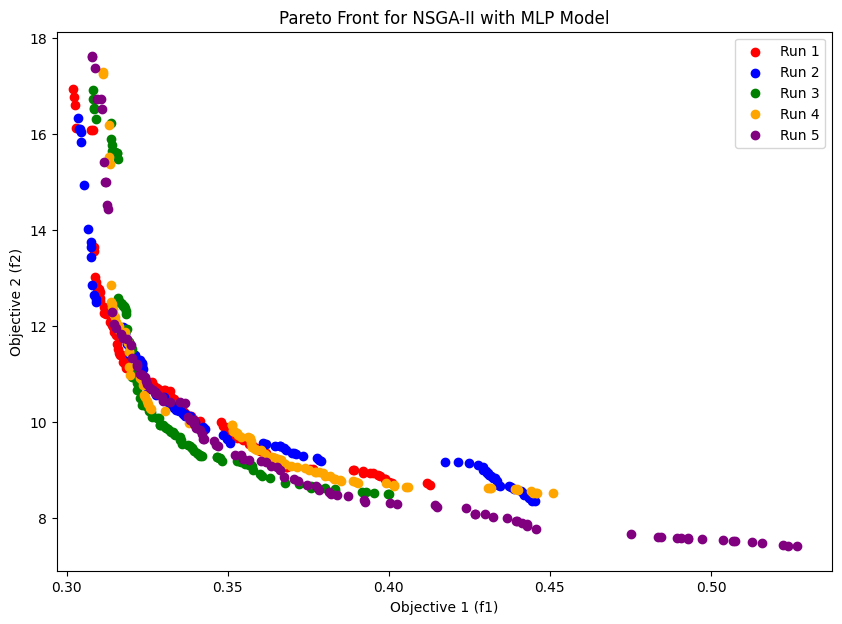

In [17]:
# Extract the initial values from row 14 for columns X1-X50
initial_values = data.iloc[13, 2:52].values  # Extracting X1-X50 from row 14

# Define the optimization problem
class F1F2Problem(Problem):
    def __init__(self, model_y1, model_y2, initial_values):
        n_var = 70  # Total number of features
        xl_x1_x50 = initial_values  # Fix X1-X50
        xu_x1_x50 = initial_values  # Fix X1-X50

        # Define the range for X51-X70 (10 to 49)
        xl_x51_x70 = np.full(20, 10)
        xu_x51_x70 = np.full(20, 49)

        # Combine all the variable bounds
        xl = np.concatenate((xl_x1_x50, xl_x51_x70))
        xu = np.concatenate((xu_x1_x50, xu_x51_x70))

        super().__init__(n_var=n_var, n_obj=2, n_constr=0, xl=xl, xu=xu)
        self.model_y1 = model_y1
        self.model_y2 = model_y2

    def _evaluate(self, X, out, *args, **kwargs):
        # Scale the input data
        X_scaled = scaler.transform(X)
        # Predict F1 and F2 using the trained MLP models
        f1 = self.model_y1.predict(X_scaled)
        f2 = self.model_y2.predict(X_scaled)
        out["F"] = np.column_stack([f1, f2])

# Create the problem instance
problem = F1F2Problem(model_y1=model5, model_y2=model6, initial_values=initial_values)

# Define the algorithm with updated parameters
algorithm = NSGA2(
    pop_size=100,  # Increased population size
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.95, eta=10),  # Increased crossover probability and decreased eta
    mutation=PolynomialMutation(prob=0.25, eta=25)  # Increased mutation rate
)

# Set up colors for the different runs
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Set a fixed seed for all runs to make them identical
fixed_seed = 42

# Create a figure for the combined plot
plt.figure(figsize=(10, 7))

# Loop to run the optimization 5 times and plot the Pareto fronts in different colors
for i in range(5):
    # Execute the optimization with the fixed seed
    res = minimize(problem, algorithm, ('n_gen', 100), seed=fixed_seed+i, save_history=True, verbose=True)

    # Plot the Pareto Frontier for this run in a different color
    plt.scatter(res.F[:, 0], res.F[:, 1], color=colors[i], label=f'Run {i+1}')

# Calculate the min and max values for f1 and f2 across all runs
f1_min, f1_max = res.F[:, 0].min(), res.F[:, 0].max()
f2_min, f2_max = res.F[:, 1].min(), res.F[:, 1].max()

# Add some padding for better visualization
f1_range = f1_max - f1_min
f2_range = f2_max - f2_min

plt.xlim(f1_min - 0.05 * f1_range, f1_max + 0.05 * f1_range)  # Set the range for f1 on the x-axis
plt.ylim(f2_min - 0.05 * f2_range, f2_max + 0.05 * f2_range)  # Set the range for f2 on the y-axis

# Add labels and legend
plt.xlabel('Objective 1 (f1)')
plt.ylabel('Objective 2 (f2)')
plt.title('Pareto Front for NSGA-II with MLP Model')
plt.legend()

# Show the plot
plt.show()

In [18]:
# Model7 for y1
# Prepare the data for model7 (y1)
X = data.drop(columns=['y1', 'y2']).values
y1 = data['y1'].values

# Reshape X to be 3D as required by LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets for y1
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Construct the LSTM model for y1 (model7)
model7 = Sequential()
model7.add(LSTM(64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(1, activation='linear'))

# Compile the model
model7.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model and measure time
start_time_model7 = time.time()
history7 = model7.fit(X_train_scaled, y1_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)
end_time_model7 = time.time()

# Calculate training time
train_time_model7 = end_time_model7 - start_time_model7
print(f"Training time for y1 model (model7): {train_time_model7} seconds")

# Evaluate the model on the test set
test_loss_model7 = model7.evaluate(X_test_scaled, y1_test)
print(f"Test MSE for model7 (y1): {test_loss_model7}")

# Predict on the test set
y1_pred_model7 = model7.predict(X_test_scaled)

Epoch 1/100


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4000/4000 ━━━━━━━━━━━━━━━━━━━━ 4s 858us/step - loss: 0.0749 - val_loss: 0.0403
Epoch 2/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 831us/step - loss: 0.0424 - val_loss: 0.0341
Epoch 3/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 788us/step - loss: 0.0388 - val_loss: 0.0322
Epoch 4/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 724us/step - loss: 0.0367 - val_loss: 0.0341
Epoch 5/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 732us/step - loss: 0.0355 - val_loss: 0.0303
Epoch 6/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 708us/step - loss: 0.0343 - val_loss: 0.0300
Epoch 7/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 702us/step - loss: 0.0334 - val_loss: 0.0294
Epoch 8/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 710us/step - loss: 0.0330 - val_loss: 0.0304
Epoch 9/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 702us/step - loss: 0.0326 - val_loss: 0.0291
Epoch 10/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 732us/step - loss: 0.0319 - val_loss: 0.0290
Epoch 11/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 698us/step - loss: 0.0321 - val_loss: 0.0292
Epoch 12/

In [19]:
def plot_actual_vs_predicted(y_true, y_pred, title, xaxis_title, yaxis_title):
    fig = go.Figure()

    # Actual vs. Predicted
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=y_true,
            y=y_pred.flatten(),  # Flattening y_pred to match y_true
            marker=dict(
                color='rgba(40, 40, 250, 0.3)',
                size=5,
            ),
            name='Actual vs Predicted'
        )
    )

    # Add a 45-degree line to show the perfect prediction
    min_value = min(y_true.min(), y_pred.min())
    max_value = max(y_true.max(), y_pred.max())

    fig.add_trace(
        go.Scatter(
            x=[min_value, max_value],
            y=[min_value, max_value],
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False,
            name='Perfect Prediction Line'
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        width=700,
        height=500,
        xaxis=dict(range=[min_value, max_value]),
        yaxis=dict(range=[min_value, max_value])
    )

    # Show plot
    fig.show()

# Plot the predicted vs actual values for y1 (Model7)
plot_actual_vs_predicted(y1_test, y1_pred, "Actual vs Predicted y1 Values (Model7)", "Actual y1", "Predicted y1")

In [20]:
# Model8 for y2
# Prepare the data for model8 (y2)
X = data.drop(columns=['y1', 'y2']).values
y2 = data['y2'].values

# Reshape X to be 3D as required by LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets for y2
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Standardize data
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Construct the LSTM model for y2 (model8)
model8 = Sequential()
model8.add(LSTM(64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(1, activation='linear'))

# Compile the model
model8.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model and measure time
start_time_model8 = time.time()
history8 = model8.fit(X_train_scaled, y2_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)
end_time_model8 = time.time()

# Calculate training time
train_time_model8 = end_time_model8 - start_time_model8
print(f"Training time for y2 model (model8): {train_time_model8} seconds")

# Evaluate the model on the test set
test_loss_model8 = model8.evaluate(X_test_scaled, y2_test)
print(f"Test MSE for model8 (y2): {test_loss_model8}")

# Predict on the test set
y2_pred_model8 = model8.predict(X_test_scaled)

Epoch 1/100


/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4000/4000 ━━━━━━━━━━━━━━━━━━━━ 4s 777us/step - loss: 74.6788 - val_loss: 15.7130
Epoch 2/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 718us/step - loss: 18.1464 - val_loss: 10.7770
Epoch 3/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 721us/step - loss: 13.9122 - val_loss: 8.3826
Epoch 4/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 765us/step - loss: 11.1606 - val_loss: 7.2477
Epoch 5/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 4s 926us/step - loss: 9.5432 - val_loss: 6.5990
Epoch 6/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 774us/step - loss: 8.5809 - val_loss: 6.1983
Epoch 7/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step - loss: 7.9989 - val_loss: 5.8366
Epoch 8/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 745us/step - loss: 7.4465 - val_loss: 5.3514
Epoch 9/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 713us/step - loss: 6.8833 - val_loss: 5.0180
Epoch 10/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 719us/step - loss: 6.5082 - val_loss: 4.7975
Epoch 11/100
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 3s 773us/step - loss: 6.1996 - val_loss: 4.6573
Epo

In [21]:
# Plot the predicted vs actual values for y2 (Model8)
def plot_actual_vs_predicted(y_true, y_pred, title, xaxis_title, yaxis_title):
    fig = go.Figure()

    # Actual vs. Predicted
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=y_true,
            y=y_pred.flatten(),  # Flattening y_pred to match y_true
            marker=dict(
                color='rgba(40, 40, 250, 0.3)',
                size=5,
            ),
            name='Actual vs Predicted'
        )
    )

    # Add a 45-degree line to show the perfect prediction
    min_value = min(y_true.min(), y_pred.min())
    max_value = max(y_true.max(), y_pred.max())

    fig.add_trace(
        go.Scatter(
            x=[min_value, max_value],
            y=[min_value, max_value],
            mode='lines',
            line=dict(color='red', dash='dash'),
            showlegend=False,
            name='Perfect Prediction Line'
        )
    )

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        width=700,
        height=500,
        xaxis=dict(range=[min_value, max_value]),
        yaxis=dict(range=[min_value, max_value])
    )

    # Show plot
    fig.show()

# Plot the predicted vs actual values for y2 (Model8)
plot_actual_vs_predicted(y2_test, y2_pred, "Actual vs Predicted y2 Values (Model8)", "Actual y2", "Predicted y2")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |     12 |             - |             -
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     2 |      200 |     15 |  0.0416841195 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     3 |      300 |     13 |  0.0928695950 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     4 |      400 |     12 |  0.1608290863 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     5 |      500 |     12 |  0.0438725213 |         ideal
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     6 |      600 |     16 |  0.0207573839 |             f
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
     7 |      700 |     17 |  0.0198559971 |         ideal
4/4 ━━

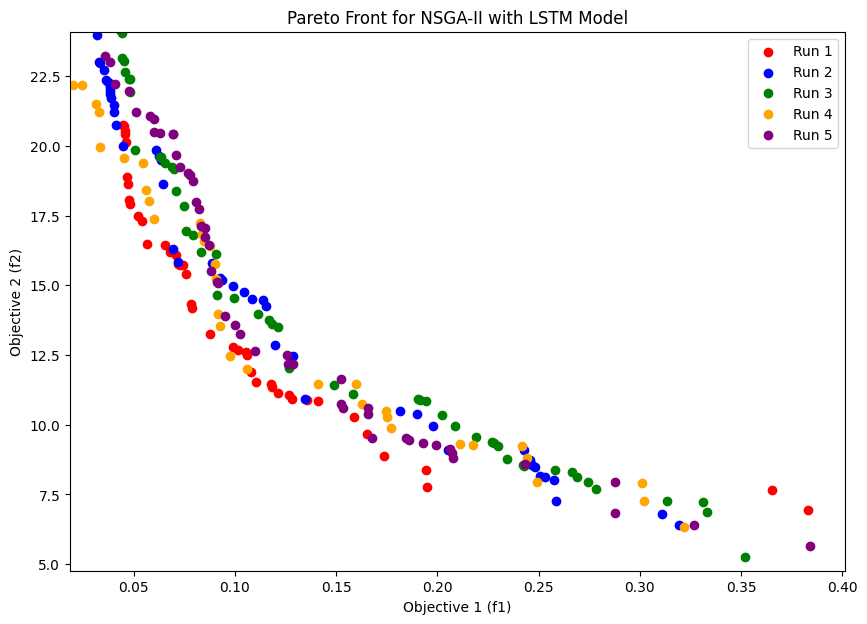

In [22]:
# Extract the initial values from row 14 for columns X1-X50
initial_values = data.iloc[13, 2:52].values  # Extracting X1-X50 from row 14

# Define the optimization problem
class F1F2Problem(Problem):
    def __init__(self, model_y1, model_y2, initial_values):
        n_var = 70  # Total number of features
        xl_x1_x50 = initial_values  # Fix X1-X50
        xu_x1_x50 = initial_values  # Fix X1-X50

        # Define the range for X51-X70 (10 to 49)
        xl_x51_x70 = np.full(20, 10)
        xu_x51_x70 = np.full(20, 49)

        # Combine all the variable bounds
        xl = np.concatenate((xl_x1_x50, xl_x51_x70))
        xu = np.concatenate((xu_x1_x50, xu_x51_x70))

        super().__init__(n_var=n_var, n_obj=2, n_constr=0, xl=xl, xu=xu)
        self.model_y1 = model_y1
        self.model_y2 = model_y2

    def _evaluate(self, X, out, *args, **kwargs):
        # Reshape X to be 3D as required by LSTM (samples, timesteps, features)
        X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

        # Scale the input data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_reshaped.reshape(-1, X_reshaped.shape[-1])).reshape(X_reshaped.shape)

        # Predict F1 and F2 using the trained LSTM models
        f1 = self.model_y1.predict(X_scaled)
        f2 = self.model_y2.predict(X_scaled)

        # Filter out negative values by setting them to zero or a small positive value
        f1[f1 < 0] = 0
        f2[f2 < 0] = 0

        out["F"] = np.column_stack([f1, f2])

# Create the problem instance for model7 and model8
problem = F1F2Problem(model_y1=model7, model_y2=model8, initial_values=initial_values)

# Define the algorithm with updated parameters
algorithm = NSGA2(
    pop_size=100,  # Population size
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.95, eta=10),  # Crossover probability and eta
    mutation=PolynomialMutation(prob=0.25, eta=25)  # Mutation rate
)

# Set up colors for the different runs
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Set a fixed seed for all runs to make them identical
fixed_seed = 42

# Create a figure for the combined plot
plt.figure(figsize=(10, 7))

# Loop to run the optimization 5 times and plot the Pareto fronts in different colors
for i in range(5):
    # Execute the optimization with the fixed seed
    res = minimize(problem, algorithm, ('n_gen', 200), seed=fixed_seed + i, save_history=True, verbose=True)

    # Plot the Pareto Frontier for this run in a different color
    plt.scatter(res.F[:, 0], res.F[:, 1], color=colors[i], label=f'Run {i+1}')

# Calculate the min and max values for f1 and f2 across all runs
f1_min, f1_max = res.F[:, 0].min(), res.F[:, 0].max()
f2_min, f2_max = res.F[:, 1].min(), res.F[:, 1].max()

# Add some padding for better visualization
f1_range = f1_max - f1_min
f2_range = f2_max - f2_min

plt.xlim(f1_min - 0.05 * f1_range, f1_max + 0.05 * f1_range)  # Set the range for f1 on the x-axis
plt.ylim(f2_min - 0.05 * f2_range, f2_max + 0.05 * f2_range)  # Set the range for f2 on the y-axis

# Add labels and legend
plt.xlabel('Objective 1 (f1)')
plt.ylabel('Objective 2 (f2)')
plt.title('Pareto Front for NSGA-II with LSTM Model')
plt.legend()
# Show the plot
plt.show()

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      6 |             - |             -
     2 |      200 |      8 |  0.0456930043 |         ideal
     3 |      300 |      9 |  0.2327752886 |         ideal
     4 |      400 |     12 |  0.1501414032 |         ideal
     5 |      500 |     14 |  0.2128632883 |         ideal
     6 |      600 |     15 |  0.0005492365 |             f
     7 |      700 |     16 |  0.0126002424 |             f
     8 |      800 |     16 |  0.0030120830 |             f
     9 |      900 |     19 |  0.0347376936 |         ideal
    10 |     1000 |     20 |  0.0018604485 |             f
    11 |     1100 |     20 |  0.0018604485 |             f
    12 |     1200 |     20 |  0.0018604485 |             f
    13 |     1300 |     21 |  0.0024426500 |             f
    14 |     1400 |     18 |  0.0078690989 |             f
    15 |     1500 |     18 |  0.000000E+00 |             f
    16 |     1600 |     18 |  0.000000E+00 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    21 |     2100 |     19 |  0.0021888049 |             f
    22 |     2200 |     19 |  0.0042552409 |             f
    23 |     2300 |     19 |  0.000000E+00 |             f
    24 |     2400 |     19 |  0.000000E+00 |             f
    25 |     2500 |     19 |  0.000000E+00 |             f
    26 |     2600 |     19 |  0.000000E+00 |             f
    27 |     2700 |     20 |  0.0022805571 |             f
    28 |     2800 |     20 |  0.0022805571 |             f
    29 |     2900 |     21 |  0.0035163896 |             f
    30 |     3000 |     21 |  0.000000E+00 |             f
    31 |     3100 |     22 |  0.0027751453 |             f
    32 |     3200 |     22 |  0.0001495317 |             f
    33 |     3300 |     23 |  0.0273365727 |         ideal
    34 |     3400 |     26 |  0.0035893140 |         ideal
    35 |     3500 |     26 |  0.0028765762 |             f
    36 |     3600 |     26 |  0.000000E+00 |             f
    37 |     3700 |     27 |  0.0024090089 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    43 |     4300 |     29 |  0.0008685713 |             f
    44 |     4400 |     29 |  0.0011858253 |             f
    45 |     4500 |     27 |  0.0034614614 |         ideal
    46 |     4600 |     27 |  0.000000E+00 |             f
    47 |     4700 |     28 |  0.1024017589 |         nadir
    48 |     4800 |     28 |  0.000000E+00 |             f
    49 |     4900 |     28 |  0.000000E+00 |             f
    50 |     5000 |     28 |  0.000000E+00 |             f
    51 |     5100 |     28 |  0.000000E+00 |             f
    52 |     5200 |     28 |  0.000000E+00 |             f
    53 |     5300 |     28 |  0.000000E+00 |             f
    54 |     5400 |     28 |  0.000000E+00 |             f
    55 |     5500 |     28 |  0.000000E+00 |             f
    56 |     5600 |     28 |  0.000000E+00 |             f
    57 |     5700 |     28 |  0.000000E+00 |             f
    58 |     5800 |     28 |  0.000000E+00 |             f
    59 |     5900 |     28 |  0.000000E+00 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    66 |     6600 |     28 |  0.0318206578 |         ideal
    67 |     6700 |     28 |  0.000000E+00 |             f
    68 |     6800 |     30 |  0.0018180894 |             f
    69 |     6900 |     31 |  0.0042833509 |             f
    70 |     7000 |     31 |  0.000000E+00 |             f
    71 |     7100 |     29 |  0.0010396244 |             f
    72 |     7200 |     29 |  0.0010396244 |             f
    73 |     7300 |     29 |  0.0010396244 |             f
    74 |     7400 |     29 |  0.0019382959 |             f
    75 |     7500 |     29 |  0.0019382959 |             f
    76 |     7600 |     29 |  0.0019382959 |             f
    77 |     7700 |     29 |  0.0019382959 |             f
    78 |     7800 |     30 |  0.0032222722 |             f
    79 |     7900 |     30 |  0.000000E+00 |             f
    80 |     8000 |     31 |  0.0015397804 |             f
    81 |     8100 |     30 |  0.0029040814 |             f
    82 |     8200 |     30 |  0.000000E+00 |            

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/opt/anaconda3/envs/blendml/lib/python3.

    89 |     8900 |     30 |  0.0004410492 |             f
    90 |     9000 |     30 |  0.0012929768 |             f
    91 |     9100 |     36 |  0.0064587164 |             f
    92 |     9200 |     36 |  0.0042941793 |             f
    93 |     9300 |     36 |  0.000000E+00 |             f
    94 |     9400 |     36 |  0.000000E+00 |             f
    95 |     9500 |     36 |  0.000000E+00 |             f
    96 |     9600 |     36 |  0.000000E+00 |             f
    97 |     9700 |     36 |  0.0001758694 |             f
    98 |     9800 |     36 |  0.0001758694 |             f
    99 |     9900 |     36 |  0.0001758694 |             f
   100 |    10000 |     36 |  0.0001758694 |             f
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |    100 |             - |             -
     2 |      200 |    100 |  0.000000E+00 |             f
     3 |      300 |    100 |  0.000000E+00 |             f
     4 |      400 |    100 |  0.000000E+00 |            

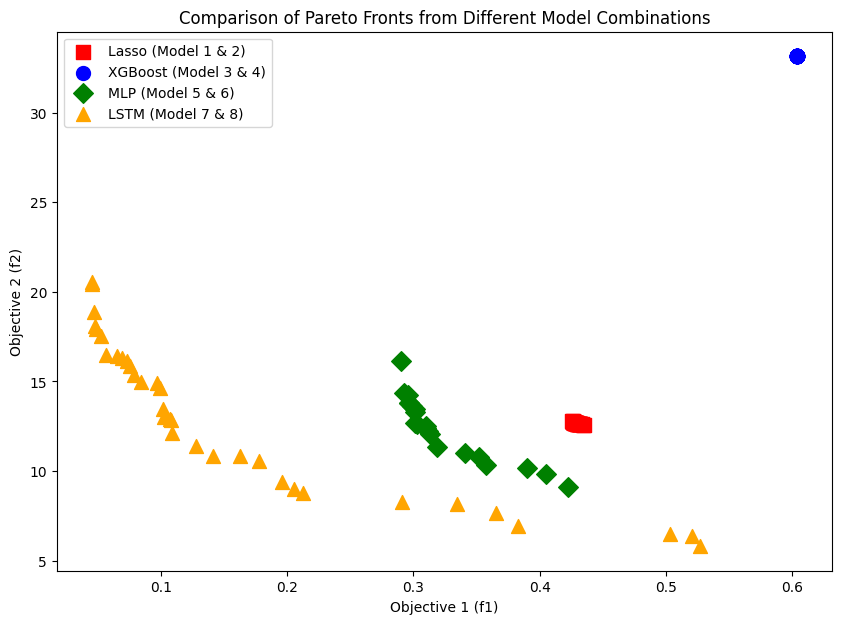

In [23]:
# Define the optimization problem
class F1F2Problem(Problem):
    def __init__(self, model_y1, model_y2, initial_values, is_lstm=False):
        n_var = 70  # Total number of features
        xl_x1_x50 = initial_values  # Fix X1-X50
        xu_x1_x50 = initial_values  # Fix X1-X50

        # Define the range for X51-X70 (10 to 49)
        xl_x51_x70 = np.full(20, 10)
        xu_x51_x70 = np.full(20, 49)

        # Combine all the variable bounds
        xl = np.concatenate((xl_x1_x50, xl_x51_x70))
        xu = np.concatenate((xu_x1_x50, xu_x51_x70))

        super().__init__(n_var=n_var, n_obj=2, n_constr=0, xl=xl, xu=xu)
        self.model_y1 = model_y1
        self.model_y2 = model_y2
        self.is_lstm = is_lstm

    def _evaluate(self, X, out, *args, **kwargs):
    # Scale the input data
      scaler = StandardScaler()
      X_scaled = scaler.fit_transform(X)

      if self.is_lstm:
          # Reshape X_scaled to be 3D if the model is LSTM
          X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

      # Predict F1 and F2 using the trained models
      f1 = self.model_y1.predict(X_scaled)
      f2 = self.model_y2.predict(X_scaled)

      # Filter out negative values by setting them to zero or a small positive value
      f1[f1 < 0] = 0
      f2[f2 < 0] = 0

      out["F"] = np.column_stack([f1, f2])





# Extract the initial values from row 14 for columns X1-X50
initial_values = data.iloc[13, 2:52].values  # Extracting X1-X50 from row 14

# Define the algorithm with updated parameters
algorithm = NSGA2(
    pop_size=100,  # Population size
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.95, eta=10),  # Crossover probability and eta
    mutation=PolynomialMutation(prob=0.25, eta=25)  # Mutation rate
)

# Set up markers and colors for the different models
markers = ['s', 'o', 'D', '^']  # Square, circle, diamond, triangle
colors = ['red', 'blue', 'green', 'orange']

# Create a figure for the combined plot
plt.figure(figsize=(10, 7))

# List of model combinations and LSTM flag
model_combinations = [
    (model1, model2, False),  # Lasso
    (model3, model4, False),  # XGBoost
    (model5, model6, False),  # MLP
    (model7, model8, True)    # LSTM
]

# Variables to track the min and max values for f1 and f2
f1_min, f1_max = np.inf, -np.inf
f2_min, f2_max = np.inf, -np.inf

# Loop to run the optimization for each model combination and plot the Pareto fronts
for idx, (model_y1, model_y2, is_lstm) in enumerate(model_combinations):
    # Instantiate the problem with the current model combination
    problem = F1F2Problem(model_y1=model_y1, model_y2=model_y2, initial_values=initial_values, is_lstm=is_lstm)

    # Execute the optimization with a fixed seed for reproducibility
    res = minimize(problem, algorithm, ('n_gen', 100), seed=42, save_history=True, verbose=True)

    # Update the min and max values for f1 and f2
    f1_min = min(f1_min, res.F[:, 0].min())
    f1_max = max(f1_max, res.F[:, 0].max())
    f2_min = min(f2_min, res.F[:, 1].min())
    f2_max = max(f2_max, res.F[:, 1].max())

    # Plot the Pareto Frontier for this model combination
    plt.scatter(res.F[:, 0], res.F[:, 1], color=colors[idx], marker=markers[idx], label=f'Model Set {idx+1}', s=100)

# Add some padding for better visualization
f1_range = f1_max - f1_min
f2_range = f2_max - f2_min

plt.xlim(f1_min - 0.05 * f1_range, f1_max + 0.05 * f1_range)  # Dynamically set the range for f1 on the x-axis
plt.ylim(f2_min - 0.05 * f2_range, f2_max + 0.05 * f2_range)  # Dynamically set the range for f2 on the y-axis

# Add labels, title, and legend
plt.xlabel('Objective 1 (f1)')
plt.ylabel('Objective 2 (f2)')
plt.title('Comparison of Pareto Fronts from Different Model Combinations')
plt.legend(labels=['Lasso (Model 1 & 2)', 'XGBoost (Model 3 & 4)', 'MLP (Model 5 & 6)', 'LSTM (Model 7 & 8)'])

# Show the plot
plt.show()

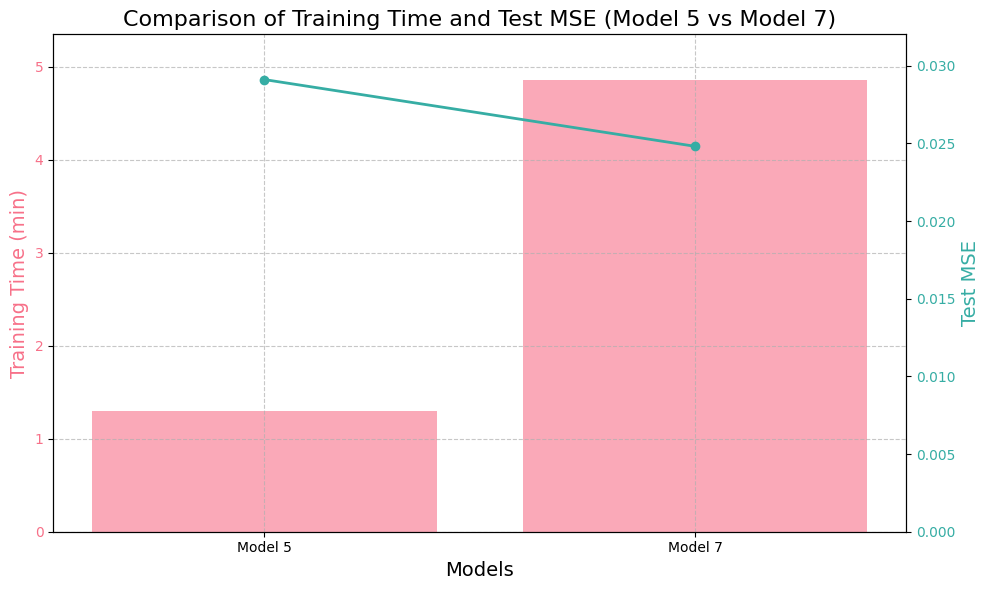

In [24]:
# Convert training time from seconds to minutes
train_time_model5_minutes = train_time_model5 / 60
train_time_model7_minutes = train_time_model7 / 60

# Data for plotting
models_57 = ['Model 5', 'Model 7']
training_times_57 = [train_time_model5_minutes, train_time_model7_minutes]
test_losses_57 = [test_loss_model5, test_loss_model7]

# Set up the color palette
palette = sns.color_palette("husl", 2)

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the training time as a bar chart on the left y-axis
ax1.bar(models_57, training_times_57, color=palette[0], alpha=0.6, label='Training Time (min)')
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Training Time (min)', fontsize=14, color=palette[0])
ax1.tick_params(axis='y', labelcolor=palette[0])
ax1.set_ylim(0, max(training_times_57) * 1.1)  # Start y-axis from 0

# Create the second y-axis for test MSE
ax2 = ax1.twinx()
ax2.plot(models_57, test_losses_57, color=palette[1], marker='o', linestyle='-', linewidth=2, label='Test MSE')
ax2.set_ylabel('Test MSE', fontsize=14, color=palette[1])
ax2.tick_params(axis='y', labelcolor=palette[1])
ax2.set_ylim(0, max(test_losses_57) * 1.1)  # Start y-axis from 0

# Add a title and grid
plt.title('Comparison of Training Time and Test MSE (Model 5 vs Model 7)', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits without overlap
fig.tight_layout()

# Show the plot
plt.show()

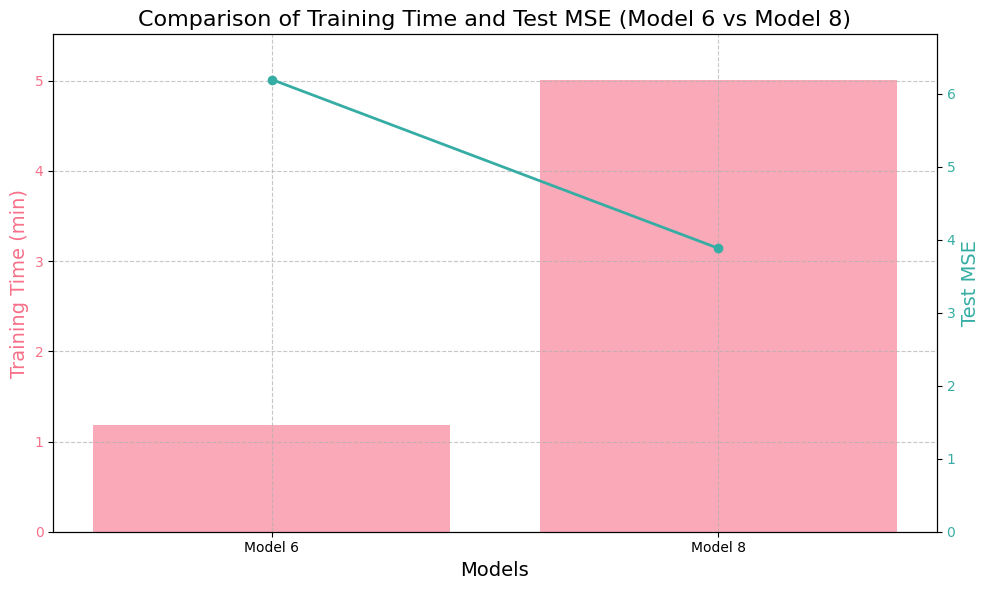

In [25]:
# Convert training time from seconds to minutes
train_time_model6_minutes = train_time_model6 / 60
train_time_model8_minutes = train_time_model8 / 60

# Data for plotting
models_68 = ['Model 6', 'Model 8']
training_times_68 = [train_time_model6_minutes, train_time_model8_minutes]
test_losses_68 = [test_loss_model6, test_loss_model8]

# Set up the color palette
palette = sns.color_palette("husl", 2)

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the training time as a bar chart on the left y-axis
ax1.bar(models_68, training_times_68, color=palette[0], alpha=0.6, label='Training Time (min)')
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Training Time (min)', fontsize=14, color=palette[0])
ax1.tick_params(axis='y', labelcolor=palette[0])
ax1.set_ylim(0, max(training_times_68) * 1.1)  # Start y-axis from 0

# Create the second y-axis for test MSE
ax2 = ax1.twinx()
ax2.plot(models_68, test_losses_68, color=palette[1], marker='o', linestyle='-', linewidth=2, label='Test MSE')
ax2.set_ylabel('Test MSE', fontsize=14, color=palette[1])
ax2.tick_params(axis='y', labelcolor=palette[1])
ax2.set_ylim(0, max(test_losses_68) * 1.1)  # Start y-axis from 0

# Add a title and grid
plt.title('Comparison of Training Time and Test MSE (Model 6 vs Model 8)', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits without overlap
fig.tight_layout()

# Show the plot
plt.show()

In [26]:
import numpy as np, pandas as pd

F = np.asarray(res.F)  # columns: [y1_pred, y2_pred] (surrogate objectives)
X = np.asarray(res.X)  # decision vars (expecting 70: first 50 qualities, next 20 deposition x)

df = pd.DataFrame({
    'y1_pred': F[:, 0],
    'y2_pred': F[:, 1],
})

# Map X -> x1..x70 (adjust indexing if your X layout differs)
for i in range(50):
    df[f'x{i+1}'] = X[:, i]
for i in range(20):
    df[f'x{i+51}'] = X[:, 50 + i]

out_path = '/Users/keithkumar/Desktop/Masters/Dissertation/machine-learning-eval-2025/front_ml.csv'
df.to_csv(out_path, index=False)
print("Saved ML front to:", out_path, "| shape:", df.shape)


Saved ML front to: /Users/keithkumar/Desktop/Masters/Dissertation/machine-learning-eval-2025/front_ml.csv | shape: (34, 72)


In [27]:
# --- SAVE NSGA FRONT (per setting) ---
# Minimal config: set these once at the top of the model notebook or right here.
POP_SIZE = globals().get("POP_SIZE", 100)      # set to your actual pop size
EVALS    = globals().get("EVALS", 20000)       # set to your actual eval budget
RUN_ID   = globals().get("RUN_ID", 1)          # set to 1,2,3... if you repeat runs

import os, numpy as np, pandas as pd

F = np.asarray(res.F)   # shape (N, 2): surrogate objectives
X = np.asarray(res.X)   # shape (N, 70): decision vars

df = pd.DataFrame({"y1_pred": F[:,0], "y2_pred": F[:,1]})
for i in range(50): df[f"x{i+1}"] = X[:, i]
for i in range(20): df[f"x{i+51}"] = X[:, 50+i]

out_dir = '/Users/keithkumar/Desktop/Masters/Dissertation/machine-learning-eval-2025/nsga_outputs'
os.makedirs(out_dir, exist_ok=True)
out_path = f"{out_dir}/front_pop{POP_SIZE}_evals{EVALS}_run{RUN_ID}.csv"
df.to_csv(out_path, index=False)
print("Saved:", out_path, "| shape:", df.shape)


Saved: /Users/keithkumar/Desktop/Masters/Dissertation/machine-learning-eval-2025/nsga_outputs/front_pop100_evals20000_run1.csv | shape: (34, 72)


RQ (Optimization parameters): Batch NSGA-II runs for population size & evaluation budget

In [28]:
import numpy as np, inspect
from pymoo.optimize import minimize as pymoo_minimize
from pymoo.algorithms.moo.nsga2 import NSGA2
print("minimize ->", pymoo_minimize, "callable?", callable(pymoo_minimize))
print("NSGA2 ->", NSGA2, "callable?", callable(NSGA2))

minimize -> <function minimize at 0x156d04e50> callable? True
NSGA2 -> <class 'pymoo.algorithms.moo.nsga2.NSGA2'> callable? True


In [ ]:
# === EXPERIMENT DRIVER (MLP + XGBoost + LSTM, optimized IO/inference) ===
# Saves ONLY predicted objectives; re-evaluation happens later in 02_front_reeval_sensitivity.ipynb

import os, re, gc, time, warnings
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats.qmc import LatinHypercube

from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.termination import get_termination

# ------------ CONFIG ------------
RESULTS_DIR = Path("Results/exp")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

CURVE_CSV = Path('/Users/keithkumar/Desktop/Masters/Dissertation/machine-learning-eval-2025/front_ml.csv')  # fallback to `data` if missing
N_CURVES = 9
POPS = [50, 200]
EVALS = [20000, 40000]
SEEDS_PER_CELL = 1
MODEL_FAMILIES = ["mlp", "xgb", "lstm"]

# Speed knobs
SKIP_IF_EXISTS   = True
PRED_BATCH       = 4096             # large Keras batch
DTYPE            = np.float32
ELIM_DUPLICATES  = True

# ------------ PREFLIGHT ------------
def _get_first(names):
    for n in names:
        if n in globals():
            return globals()[n]
    return None

# Find models per family with sensible fallbacks
mdl_map = {
    "xgb":  {"y1": _get_first(["model3", "xgb_y1", "model_xgb_y1"]),
             "y2": _get_first(["model4", "xgb_y2", "model_xgb_y2"])},
    "mlp":  {"y1": _get_first(["model5", "mlp_y1", "model_mlp_y1"]),
             "y2": _get_first(["model6", "mlp_y2", "model_mlp_y2"])},
    "lstm": {"y1": _get_first(["model1", "lstm_y1", "model_lstm_y1"]),
             "y2": _get_first(["model2", "lstm_y2", "model_lstm_y2"])},
}

missing = []
for fam in MODEL_FAMILIES:
    if mdl_map.get(fam, {}).get("y1") is None: missing.append(f"{fam} y1 model")
    if mdl_map.get(fam, {}).get("y2") is None: missing.append(f"{fam} y2 model")

def _any(names): return any(n in globals() for n in names)
if not _any(["scaler", "scaler_mlp", "scaler_standard"]):
    missing.append("scaler for input features")

assert not missing, f"Run training cells first. Missing: {missing}"

sc_global = globals().get("scaler") or globals().get("scaler_mlp") or globals().get("scaler_standard")
print("[ok] models & scaler found:",
      {k: {'y1': mdl_map[k]['y1'] is not None, 'y2': mdl_map[k]['y2'] is not None} for k in MODEL_FAMILIES})

# ------------ CURVE SELECTION (LHS) ------------
def load_curves_from_matrix(csv_path, n_pick=30, random_state=42):
    cols = [f"x{i}" for i in range(1, 51)]
    df = pd.read_csv(csv_path, usecols=cols, dtype=DTYPE)
    n = len(df)
    lhs = LatinHypercube(1, seed=random_state).random(n_pick).flatten()
    idxs = np.clip((lhs * n).astype(int), 0, n-1)
    idxs = np.unique(idxs)
    while len(idxs) < n_pick:
        idxs = np.unique(np.concatenate([idxs, np.random.RandomState(random_state)
                                         .randint(0, n, n_pick-len(idxs))]))
    picked = df.iloc[idxs[:n_pick]].copy()
    picked["curve_id"] = np.arange(1, n_pick+1)
    return picked

if CURVE_CSV.exists():
    CURVES = load_curves_from_matrix(CURVE_CSV, n_pick=N_CURVES, random_state=42)
else:
    cols = [f"x{i}" for i in range(1, 51)]
    assert "data" in globals(), "Neither CURVE_CSV nor `data` with x1..x50 is available."
    CURVES = data.loc[:, cols].sample(N_CURVES, random_state=42).astype(DTYPE).copy()
    CURVES["curve_id"] = np.arange(1, N_CURVES+1)

# ------------ Fast scaler helpers (for StandardScaler) ------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
_is_std = isinstance(sc_global, StandardScaler)

def _scale_concat_fixed50_and_x20(x1x50, X20):
    """Return scaled (n,70) using StandardScaler stats, without calling sc.transform for fixed cols."""
    X20 = np.asarray(X20, dtype=DTYPE)
    n = X20.shape[0]
    X = np.empty((n, 70), dtype=DTYPE)
    X[:, :50] = x1x50
    X[:, 50:] = X20
    if _is_std:
        m = sc_global.mean_.astype(DTYPE)
        s = sc_global.scale_.astype(DTYPE)
        X -= m
        X /= (s + DTYPE(1e-12))
    else:
        # For non-StandardScaler, let it handle names itself if it was fit with names
        names = getattr(sc_global, "feature_names_in_", None)
        if names is not None and len(names) == X.shape[1]:
            X = pd.DataFrame(X, columns=list(names))
        X = sc_global.transform(np.asarray(X, dtype=np.float64)).astype(DTYPE)
    return X

# ------------ Universal prediction & Keras-only reshape ------------
def _is_keras_model(m):
    mod = m.__class__.__module__
    return ("keras" in mod) or ("tensorflow" in mod)

def _to_model_input(model, X):
    """If the model (or pipeline) was fit with feature names, pass a DataFrame to silence warnings."""
    if getattr(X, "ndim", 2) != 2:
        return X
    names = getattr(model, "feature_names_in_", None)
    if names is not None and X.shape[1] == len(names):
        return pd.DataFrame(X, columns=list(names))
    if isinstance(model, Pipeline):
        names = getattr(model, "feature_names_in_", None)
        if names is not None and X.shape[1] == len(names):
            return pd.DataFrame(X, columns=list(names))
    return X

def _predict_any(model, X):
    Xin = _to_model_input(model, X)
    try:
        # Works for Keras; sklearn will raise TypeError on batch_size/verbose
        return model.predict(Xin, batch_size=PRED_BATCH, verbose=0)
    except TypeError:
        return model.predict(Xin)

def _reshape_for_keras(model, Xs_70):
    """Only reshape for real Keras models that expect 3D; default to (70,1)."""
    if not _is_keras_model(model):
        return Xs_70
    shp = getattr(model, "input_shape", None)
    if isinstance(shp, list):  # multi-input
        shp = shp[0]
    if shp is None or len(shp) == 2:
        return Xs_70
    if len(shp) == 3:
        T, F = shp[1], shp[2]
        if (T is None) and (F is None):
            T, F = 70, 1
        elif (T is None) and (F is not None) and (70 % F == 0):
            T = 70 // F
        elif (F is None) and (T is not None) and (70 % T == 0):
            F = 70 // T
        if (T is None) or (F is None) or (T * F != 70):
            T, F = 70, 1
        return Xs_70.reshape((-1, int(T), int(F)))
    return Xs_70

# ------------ PROBLEM FACTORY (vectorised; large-batch predict) ------------
def make_problem_for_curve(model_family:str, curve_row:pd.Series, bounds=(10.0, 49.0)):
    x1x50 = curve_row.values.astype(DTYPE)  # (50,)
    lb, ub = bounds
    n_var = 20

    if model_family == "mlp":
        mdl_y1, mdl_y2 = mdl_map["mlp"]["y1"], mdl_map["mlp"]["y2"]
        def pred(X20):
            if sc_global is not None:
                Xs = _scale_concat_fixed50_and_x20(x1x50, X20)
            else:
                X20 = np.asarray(X20, dtype=DTYPE)
                Xs = np.empty((len(X20), 70), dtype=DTYPE); Xs[:, :50] = x1x50; Xs[:, 50:] = X20
            y1 = _predict_any(mdl_y1, Xs).reshape(-1).astype(DTYPE)
            y2 = _predict_any(mdl_y2, Xs).reshape(-1).astype(DTYPE)
            return y1, y2

    elif model_family == "xgb":
        mdl_y1, mdl_y2 = mdl_map["xgb"]["y1"], mdl_map["xgb"]["y2"]
        def pred(X20):
            X20 = np.asarray(X20, dtype=DTYPE)
            X = np.empty((len(X20), 70), dtype=DTYPE); X[:, :50] = x1x50; X[:, 50:] = X20
            y1 = _predict_any(mdl_y1, X).reshape(-1).astype(DTYPE)
            y2 = _predict_any(mdl_y2, X).reshape(-1).astype(DTYPE)
            return y1, y2

    elif model_family == "lstm":
        mdl_y1, mdl_y2 = mdl_map["lstm"]["y1"], mdl_map["lstm"]["y2"]
        def pred(X20):
            if sc_global is not None:
                Xs = _scale_concat_fixed50_and_x20(x1x50, X20)
            else:
                X20 = np.asarray(X20, dtype=DTYPE)
                Xs = np.empty((len(X20), 70), dtype=DTYPE); Xs[:, :50] = x1x50; Xs[:, 50:] = X20
            Xs1 = _reshape_for_keras(mdl_y1, Xs)
            Xs2 = _reshape_for_keras(mdl_y2, Xs)
            y1 = _predict_any(mdl_y1, Xs1).reshape(-1).astype(DTYPE)
            y2 = _predict_any(mdl_y2, Xs2).reshape(-1).astype(DTYPE)
            return y1, y2

    else:
        raise ValueError("model_family must be one of {'mlp','xgb','lstm'}")

    class F1F2ProblemSur(Problem):
        def __init__(self):
            super().__init__(n_var=n_var, n_obj=2, n_constr=0,
                             xl=np.full(n_var, lb, dtype=DTYPE),
                             xu=np.full(n_var, ub, dtype=DTYPE))
        def _evaluate(self, X, out, *args, **kwargs):
            X = np.asarray(X, dtype=DTYPE)
            f1, f2 = pred(X)
            out["F"] = np.column_stack([f1, f2]).astype(DTYPE)

    return F1F2ProblemSur()

# ------------ NSGA-II runner ------------
def run_nsga2(problem, pop_size:int, n_evals:int, seed:int=1):
    term = get_termination("n_evals", int(n_evals))
    alg = NSGA2(pop_size=int(pop_size), eliminate_duplicates=ELIM_DUPLICATES)
    res = minimize(problem, alg, termination=term, seed=int(seed),
                   verbose=False, save_history=False)
    return res.X.astype(DTYPE), res.F.astype(DTYPE)

# ------------ DESIGN GRID & RUN ------------
design = []
for model_family in MODEL_FAMILIES:
    for pop in POPS:
        for ne in EVALS:
            for seed in range(1, SEEDS_PER_CELL+1):
                for _, curve in CURVES.iterrows():
                    design.append((model_family, pop, ne, seed, int(curve["curve_id"])))
print(f"[ok] design generated: {len(design)} runs")

for k, (model_family, pop, ne, seed, cid) in enumerate(design, start=1):
    out = RESULTS_DIR / f"front_model{model_family}_pop{pop}_evals{ne}_curve{cid}_run{seed}.csv"
    if SKIP_IF_EXISTS and out.exists():
        if k % 10 == 0: print(f"[skip] {k}/{len(design)} already exists")
        continue

    q_curve = CURVES.loc[CURVES["curve_id"]==cid, [f"x{i}" for i in range(1,51)]].iloc[0]
    problem = make_problem_for_curve(model_family, q_curve, bounds=(DTYPE(10), DTYPE(49)))
    X20, F_pred = run_nsga2(problem, pop_size=pop, n_evals=ne, seed=seed)

    # build output frame (float32 to save disk/time)
    df = pd.DataFrame(F_pred, columns=["y1_pred","y2_pred"], dtype=DTYPE)
    for j in range(20): df[f"x{50+j+1}"] = X20[:, j].astype(DTYPE)
    for j in range(50): df[f"x{j+1}"]  = DTYPE(q_curve.iloc[j])
    df["model"] = model_family; df["pop"] = pop; df["evals"] = ne
    df["seed"] = seed; df["curve_id"] = cid

    df.to_csv(out, index=False, float_format="%.7g")
    if k % 5 == 0 or k == len(design):
        print(f"[ok] {k}/{len(design)} saved {out.name}")

    if k % 10 == 0:
        gc.collect()


[ok] models & scaler found: {'mlp': {'y1': True, 'y2': True}, 'xgb': {'y1': True, 'y2': True}, 'lstm': {'y1': True, 'y2': True}}
[ok] design generated: 108 runs
[skip] 10/108 already exists
[skip] 20/108 already exists
[skip] 30/108 already exists
[skip] 40/108 already exists
[skip] 50/108 already exists
[skip] 60/108 already exists
[skip] 70/108 already exists
[ok] 75/108 saved front_modellstm_pop50_evals20000_curve3_run1.csv
[ok] 80/108 saved front_modellstm_pop50_evals20000_curve8_run1.csv
[ok] 85/108 saved front_modellstm_pop50_evals40000_curve4_run1.csv
[ok] 90/108 saved front_modellstm_pop50_evals40000_curve9_run1.csv
[ok] 95/108 saved front_modellstm_pop200_evals20000_curve5_run1.csv
[ok] 100/108 saved front_modellstm_pop200_evals40000_curve1_run1.csv
[ok] 105/108 saved front_modellstm_pop200_evals40000_curve6_run1.csv
[ok] 108/108 saved front_modellstm_pop200_evals40000_curve9_run1.csv


In [ ]:
# === VARIABLE-COUNT SWEEP (FAST): n_vars ∈ {10,15,20} across MLP+XGB+LSTM × pops × evals ===
# Writes fronts with y1_pred, y2_pred and x1..x70; filenames include _nvars{K}

import os, gc, numpy as np, pandas as pd
from pathlib import Path

# ------- CONFIG -------
N_VARS_LIST      = [10, 15, 20]               # active deposition vars (from the 20 in x51..x70)
FREEZE_STRATEGY  = "interleave"               # "tail" | "head" | "interleave"
BOUNDS           = (10.0, 49.0)               # bounds for deposition vars
RESULTS_DIR      = Path("Results/exp")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)
DTYPE            = np.float32
PRED_BATCH       = 4096                       # big-batch Keras inference (ignored by sklearn)
ELIM_DUPLICATES  = True
SKIP_IF_EXISTS   = True

# ---- speed caps for the mini-study (reproducible & sensible) ----
POP_CAP          = 100
EVALS_CAP_BY_NV  = {10: 10_000, 15: 15_000, 20: 20_000}

# ------- REUSE (from earlier) OR FALL BACK IF NEEDED -------
def _any(names): return any(n in globals() for n in names)
def _get_first(names):
    for n in names:
        if n in globals():
            return globals()[n]
    return None

# Curves
if 'CURVES' not in globals():
    from scipy.stats.qmc import LatinHypercube
    CURVE_CSV = Path('/Users/keithkumar/Desktop/Masters/Dissertation/machine-learning-eval-2025/front_ml.csv')
    if CURVE_CSV.exists():
        cols = [f"x{i}" for i in range(1,51)]
        dfm = pd.read_csv(CURVE_CSV, usecols=cols, dtype=DTYPE)
        N_CURVES = 30
        lhs = LatinHypercube(1, seed=42).random(N_CURVES).flatten()
        idxs = np.clip((lhs * len(dfm)).astype(int), 0, len(dfm)-1)
        idxs = np.unique(idxs)
        while len(idxs) < N_CURVES:
            idxs = np.unique(np.concatenate([idxs, np.random.RandomState(42).randint(0, len(dfm), N_CURVES-len(idxs))]))
        CURVES = dfm.iloc[idxs[:N_CURVES]].copy()
        CURVES["curve_id"] = np.arange(1, N_CURVES+1)
    else:
        assert "data" in globals(), "Neither CURVE_CSV nor `data` present to construct CURVES."
        CURVES = data[[f"x{i}" for i in range(1,51)]].sample(30, random_state=42).astype(DTYPE).copy()
        CURVES["curve_id"] = np.arange(1, 31)

# Models: now including LSTM
MODEL_FAMILIES = ["mlp", "xgb", "lstm"]

# Locate trained models per family
mdl_map = {
    "xgb":  {"y1": _get_first(["model3", "xgb_y1", "model_xgb_y1"]),
             "y2": _get_first(["model4", "xgb_y2", "model_xgb_y2"])},
    "mlp":  {"y1": _get_first(["model5", "mlp_y1", "model_mlp_y1"]),
             "y2": _get_first(["model6", "mlp_y2", "model_mlp_y2"])},
    "lstm": {"y1": _get_first(["model1", "lstm_y1", "model_lstm_y1"]),
             "y2": _get_first(["model2", "lstm_y2", "model_lstm_y2"])},
}
_missing = []
for fam in MODEL_FAMILIES:
    if mdl_map[fam]["y1"] is None: _missing.append(f"{fam} y1 model")
    if mdl_map[fam]["y2"] is None: _missing.append(f"{fam} y2 model")
assert not _missing, f"Load/define models first. Missing: {_missing}"

# POPS / EVALS (design pool; caps will apply per run)
if 'POPS' not in globals():  POPS  = [50, 200]
if 'EVALS' not in globals(): EVALS = [20_000, 40_000]
if 'SEEDS_PER_CELL' not in globals(): SEEDS_PER_CELL = 1

# ------- Optimised surrogate problem (float32 + fast scaler + safe predict) -------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
sc_global = globals().get("scaler") or globals().get("scaler_mlp") or globals().get("scaler_standard")
_is_std = isinstance(sc_global, StandardScaler)

def _scale_concat_fixed50_and_x20(x1x50, X20):
    X20 = np.asarray(X20, dtype=DTYPE)
    n = X20.shape[0]
    X = np.empty((n, 70), dtype=DTYPE)
    X[:, :50] = x1x50
    X[:, 50:] = X20
    if sc_global is None:
        return X
    if _is_std:
        m = sc_global.mean_.astype(DTYPE)
        s = sc_global.scale_.astype(DTYPE)
        X -= m
        X /= (s + DTYPE(1e-12))
        return X
    else:
        # If scaler was fit with names, pass a DataFrame to avoid warnings
        names = getattr(sc_global, "feature_names_in_", None)
        Xin = pd.DataFrame(X, columns=list(names)) if (names is not None and len(names)==X.shape[1]) else X
        return sc_global.transform(np.asarray(Xin, dtype=np.float64)).astype(DTYPE)

# ---- Safe prediction + Keras-only reshape ----
def _is_keras_model(m):
    mod = m.__class__.__module__
    return ("keras" in mod) or ("tensorflow" in mod)

def _to_model_input(model, X):
    if getattr(X, "ndim", 2) != 2:
        return X
    names = getattr(model, "feature_names_in_", None)
    if names is not None and X.shape[1] == len(names):
        return pd.DataFrame(X, columns=list(names))
    if isinstance(model, Pipeline):
        names = getattr(model, "feature_names_in_", None)
        if names is not None and X.shape[1] == len(names):
            return pd.DataFrame(X, columns=list(names))
    return X

def _predict_any(model, X):
    Xin = _to_model_input(model, X)
    try:
        return model.predict(Xin, batch_size=PRED_BATCH, verbose=0)
    except TypeError:
        return model.predict(Xin)

def _reshape_for_keras(model, Xs_70):
    if not _is_keras_model(model):
        return Xs_70
    shp = getattr(model, "input_shape", None)
    if isinstance(shp, list): shp = shp[0]
    if (shp is None) or (len(shp) == 2):
        return Xs_70
    if len(shp) == 3:
        T, F = shp[1], shp[2]
        if (T is None) and (F is None):
            T, F = 70, 1
        elif (T is None) and (F is not None) and (70 % F == 0):
            T = 70 // F
        elif (F is None) and (T is not None) and (70 % T == 0):
            F = 70 // T
        if (T is None) or (F is None) or (T * F != 70):
            T, F = 70, 1
        return Xs_70.reshape((-1, int(T), int(F)))
    return Xs_70

def make_problem_for_curve_fast(model_family:str, curve_row:pd.Series, bounds=(10.0,49.0)):
    x1x50 = curve_row.values.astype(DTYPE)
    lb, ub = bounds
    n_var = 20

    if model_family == "mlp":
        mdl_y1, mdl_y2 = mdl_map["mlp"]["y1"], mdl_map["mlp"]["y2"]
        def pred(X20):
            Xs = _scale_concat_fixed50_and_x20(x1x50, X20)
            y1 = _predict_any(mdl_y1, Xs).reshape(-1).astype(DTYPE)
            y2 = _predict_any(mdl_y2, Xs).reshape(-1).astype(DTYPE)
            return y1, y2

    elif model_family == "xgb":
        mdl_y1, mdl_y2 = mdl_map["xgb"]["y1"], mdl_map["xgb"]["y2"]
        def pred(X20):
            X20 = np.asarray(X20, dtype=DTYPE)
            X = np.empty((len(X20), 70), dtype=DTYPE); X[:, :50] = x1x50; X[:, 50:] = X20
            y1 = _predict_any(mdl_y1, X).reshape(-1).astype(DTYPE)
            y2 = _predict_any(mdl_y2, X).reshape(-1).astype(DTYPE)
            return y1, y2

    elif model_family == "lstm":
        mdl_y1, mdl_y2 = mdl_map["lstm"]["y1"], mdl_map["lstm"]["y2"]
        def pred(X20):
            Xs = _scale_concat_fixed50_and_x20(x1x50, X20)
            Xs1 = _reshape_for_keras(mdl_y1, Xs)
            Xs2 = _reshape_for_keras(mdl_y2, Xs)
            y1 = _predict_any(mdl_y1, Xs1).reshape(-1).astype(DTYPE)
            y2 = _predict_any(mdl_y2, Xs2).reshape(-1).astype(DTYPE)
            return y1, y2

    else:
        raise ValueError("model_family must be one of {'mlp','xgb','lstm'}")

    from pymoo.core.problem import Problem
    class F1F2ProblemSur(Problem):
        def __init__(self):
            super().__init__(n_var=n_var, n_obj=2, n_constr=0,
                             xl=np.full(n_var, lb, dtype=DTYPE),
                             xu=np.full(n_var, ub, dtype=DTYPE))
        def _evaluate(self, X, out, *args, **kwargs):
            X = np.asarray(X, dtype=DTYPE)
            f1, f2 = pred(X)
            out["F"] = np.column_stack([f1, f2]).astype(DTYPE)
    return F1F2ProblemSur()

# ------- MASKED PROBLEM (only K vars active; others frozen to midpoint) -------
def make_problem_with_mask(model_family, curve_row, n_vars:int, bounds=BOUNDS):
    base = make_problem_for_curve_fast(model_family, curve_row, bounds)
    total = 20
    assert 1 <= n_vars <= total, "n_vars must be in [1..20]"
    # choose active indices
    if FREEZE_STRATEGY == "tail":
        active = np.arange(0, n_vars)
    elif FREEZE_STRATEGY == "head":
        active = np.arange(total-n_vars, total)
    else:  # interleave across the 20 positions
        stride = max(1, total // n_vars)
        active = np.arange(total)[::stride][:n_vars]

    from pymoo.core.problem import Problem
    class MaskedProblem(Problem):
        def __init__(self):
            super().__init__(n_var=n_vars, n_obj=2, n_constr=0,
                             xl=np.full(n_vars, bounds[0], dtype=DTYPE),
                             xu=np.full(n_vars, bounds[1], dtype=DTYPE))
        def _evaluate(self, Xsmall, out, *args, **kwargs):
            Xsmall = np.atleast_2d(np.array(Xsmall, dtype=DTYPE))
            mid = DTYPE((bounds[0] + bounds[1]) / 2.0)
            X20 = np.tile(mid, (len(Xsmall), total)).astype(DTYPE)
            X20[:, active] = Xsmall
            tmp = {}
            base._evaluate(X20, tmp)
            out["F"] = tmp["F"].astype(DTYPE)
    return MaskedProblem(), active

# ------- NSGA-II runner (with dedup + caps) -------
from pymoo.termination import get_termination
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

def run_nsga2(problem, pop_size:int, n_evals:int, seed:int=1):
    term = get_termination("n_evals", int(n_evals))
    alg  = NSGA2(pop_size=int(pop_size), eliminate_duplicates=ELIM_DUPLICATES)
    res  = minimize(problem, alg, termination=term, seed=int(seed),
                    verbose=False, save_history=False)
    return res.X.astype(DTYPE), res.F.astype(DTYPE)

# ------- DESIGN (full grid) & LIMIT TO EXACTLY 20 RUNS (balanced across n_vars) -------
design_rows = []
for model_family in MODEL_FAMILIES:
    for n_vars in N_VARS_LIST:
        for pop in POPS:
            for ne in EVALS:
                for seed in range(1, SEEDS_PER_CELL+1):
                    for _, curve in CURVES.iterrows():
                        design_rows.append({
                            "model": model_family,
                            "n_vars": n_vars,
                            "pop": int(pop),
                            "evals": int(ne),
                            "seed": int(seed),
                            "curve_id": int(curve["curve_id"])
                        })
design_df = pd.DataFrame(design_rows)

MAX_RUNS = 20
levels = list(N_VARS_LIST)
q_base = MAX_RUNS // len(levels)   # 20 // 3 = 6
rem    = MAX_RUNS %  len(levels)   # remainder = 2
rng = np.random.RandomState(42)

balanced = []
for idx, k in enumerate(levels):
    need = q_base + (1 if idx < rem else 0)  # -> 7,7,6
    sub  = design_df[design_df["n_vars"] == k].sample(n=need, random_state=rng)
    balanced.append(sub)

run_plan = pd.concat(balanced, ignore_index=True)
run_plan = run_plan.sample(frac=1.0, random_state=rng).reset_index(drop=True)

print("[plan] 20-run mini-experiment created")
print(run_plan.groupby(["model","n_vars","pop","evals"]).size().rename("count"))

# ------- RUN THE 20 JOBS (with caps + skip-if-exists) -------
for i, row in run_plan.iterrows():
    model_family = row["model"]
    n_vars       = int(row["n_vars"])
    pop_raw      = int(row["pop"])
    ne_raw       = int(row["evals"])
    seed         = int(row["seed"])
    cid          = int(row["curve_id"])

    # apply sensible caps (fewer DOFs → smaller budget; cap pop to 100)
    pop_eff = min(pop_raw, POP_CAP)
    ne_eff  = min(ne_raw, EVALS_CAP_BY_NV[n_vars])

    out = RESULTS_DIR / f"front_model{model_family}_pop{pop_eff}_evals{ne_eff}_nvars{n_vars}_curve{cid}_run{seed}.csv"
    if SKIP_IF_EXISTS and out.exists():
        print(f"[skip] {i+1:02d}/20 {out.name} exists")
        continue

    curve = CURVES.loc[CURVES["curve_id"]==cid, [f"x{i}" for i in range(1,51)]].iloc[0]
    problem, active_idx = make_problem_with_mask(model_family, curve, n_vars=n_vars, bounds=BOUNDS)
    Xsmall, F_pred = run_nsga2(problem, pop_size=pop_eff, n_evals=ne_eff, seed=seed)

    # reconstruct full deposition vector (active + frozen midpoint)
    mid = DTYPE((BOUNDS[0] + BOUNDS[1]) / 2.0)
    X20 = np.tile(mid, (len(Xsmall), 20)).astype(DTYPE)
    X20[:, active_idx] = Xsmall

    # save
    df = pd.DataFrame(F_pred, columns=["y1_pred","y2_pred"], dtype=DTYPE)
    for j in range(20): df[f"x{50+j+1}"] = X20[:, j]
    for j in range(50): df[f"x{j+1}"]    = DTYPE(curve.iloc[j])
    df["model"]    = model_family
    df["pop"]      = pop_eff
    df["evals"]    = ne_eff
    df["seed"]     = seed
    df["curve_id"] = cid
    df["n_vars"]   = n_vars

    df.to_csv(out, index=False, float_format="%.7g")
    print(f"[ok] {i+1:02d}/20 saved {out.name}")

    if (i+1) % 5 == 0:
        gc.collect()


[plan] 20-run mini-experiment created
model  n_vars  pop  evals
lstm   10      50   20000    1
                    40000    1
       15      50   40000    1
               200  20000    1
                    40000    1
       20      50   40000    1
               200  40000    2
mlp    10      50   20000    1
                    40000    1
               200  40000    1
       15      50   40000    2
       20      50   40000    1
               200  40000    2
xgb    10      200  20000    1
                    40000    1
       15      200  20000    1
                    40000    1
Name: count, dtype: int64
[ok] 01/20 saved front_modellstm_pop50_evals15000_nvars15_curve1_run1.csv
[ok] 02/20 saved front_modelmlp_pop100_evals10000_nvars10_curve4_run1.csv
[ok] 03/20 saved front_modelmlp_pop50_evals15000_nvars15_curve1_run1.csv
[ok] 04/20 saved front_modellstm_pop100_evals20000_nvars20_curve4_run1.csv
[ok] 05/20 saved front_modelmlp_pop100_evals20000_nvars20_curve1_run1.csv
[ok] 06/20 sa

100 pop

In [ ]:
# === COMPACT FULL-GRID (≤100 files): pop=100 only, evals={20k,100k}, seeds=4, curves=4 ===
# Uses: MODEL_FAMILIES, CURVES, make_problem_for_curve, run_nsga2, RESULTS_DIR, SKIP_IF_EXISTS, DTYPE

import numpy as np, pandas as pd, gc
from pathlib import Path

# ---- Safety fallbacks if run standalone  ----
try:
    RESULTS_DIR
except NameError:
    RESULTS_DIR = Path("Results/exp"); RESULTS_DIR.mkdir(parents=True, exist_ok=True)
try:
    SKIP_IF_EXISTS
except NameError:
    SKIP_IF_EXISTS = True
try:
    DTYPE
except NameError:
    DTYPE = np.float32

missing = []
for name in ["MODEL_FAMILIES", "CURVES", "make_problem_for_curve", "run_nsga2"]:
    if name not in globals():
        missing.append(name)
assert not missing, f"Run earlier blocks first; missing: {missing}"

# ---- Knobs to stay ≤100 ----
MODELS_BLOCK3     = list(MODEL_FAMILIES)          
POPS_GRID         = [100]                         # pop=100 only
EVALS_GRID        = [20_000, 100_000]             # keep both budgets
SEEDS_PER_CELL    = 4                             
CURVES_SUB_N      = 4                              
RNG               = np.random.RandomState(123)

# ---- Subsample curves deterministically for reproducibility ----
if len(CURVES) > CURVES_SUB_N:
    curves_sub = CURVES.sample(CURVES_SUB_N, random_state=RNG)
else:
    curves_sub = CURVES.copy()

# ---- Build design ----
design = []
for model_family in MODELS_BLOCK3:
    for pop in POPS_GRID:
        for ne in EVALS_GRID:
            for seed in range(1, SEEDS_PER_CELL + 1):
                for _, curve in curves_sub.iterrows():
                    cid = int(curve["curve_id"])
                    design.append((model_family, pop, ne, seed, cid))

design = np.array(design, dtype=object)
RNG.shuffle(design)

planned = (len(MODELS_BLOCK3) * len(POPS_GRID) * len(EVALS_GRID) *
           SEEDS_PER_CELL * len(curves_sub))
print(f"[plan] Block 3 will create up to {planned} files "
      f"({len(MODELS_BLOCK3)} models × {len(POPS_GRID)} pops × "
      f"{len(EVALS_GRID)} evals × {SEEDS_PER_CELL} seeds × {len(curves_sub)} curves)")

# ---- Run (idempotent) ----
saved = skipped = 0
for k, (model_family, pop, ne, seed, cid) in enumerate(design, start=1):
    out = RESULTS_DIR / f"front_model{model_family}_pop{int(pop)}_evals{int(ne)}_curve{int(cid)}_run{int(seed)}.csv"
    if SKIP_IF_EXISTS and out.exists():
        skipped += 1
        if k % 10 == 0: print(f"[skip] {k}/{planned} … skipped={skipped}, saved={saved}")
        continue

    q_curve = CURVES.loc[CURVES["curve_id"] == cid, [f"x{i}" for i in range(1, 51)]].iloc[0]
    problem = make_problem_for_curve(model_family, q_curve, bounds=(DTYPE(10), DTYPE(49)))
    X20, F_pred = run_nsga2(problem, pop_size=int(pop), n_evals=int(ne), seed=int(seed))

    df = pd.DataFrame(F_pred, columns=["y1_pred","y2_pred"], dtype=DTYPE)
    for j in range(20): df[f"x{50+j+1}"] = X20[:, j].astype(DTYPE)   # x51..x70
    for j in range(50): df[f"x{j+1}"]    = DTYPE(q_curve.iloc[j])    # x1..x50
    df["model"]    = model_family
    df["pop"]      = int(pop)
    df["evals"]    = int(ne)
    df["seed"]     = int(seed)
    df["curve_id"] = int(cid)

    df.to_csv(out, index=False, float_format="%.7g")
    saved += 1
    if (k % 10 == 0) or (k == planned):
        print(f"[ok] {k}/{planned} saved={saved} skipped={skipped} (last: {out.name})")
    if (k % 25 == 0): gc.collect()

print(f"[done] saved={saved}, skipped={skipped}, planned={planned}")


[plan] Block 3 will create up to 96 files (3 models × 1 pops × 2 evals × 4 seeds × 4 curves)
[ok] 10/96 saved=10 skipped=0 (last: front_modelxgb_pop100_evals100000_curve6_run4.csv)
[ok] 20/96 saved=20 skipped=0 (last: front_modelmlp_pop100_evals100000_curve8_run3.csv)
[ok] 30/96 saved=30 skipped=0 (last: front_modelmlp_pop100_evals20000_curve1_run3.csv)
[ok] 40/96 saved=40 skipped=0 (last: front_modelmlp_pop100_evals100000_curve1_run1.csv)
[ok] 50/96 saved=50 skipped=0 (last: front_modellstm_pop100_evals100000_curve1_run1.csv)
[ok] 60/96 saved=60 skipped=0 (last: front_modelxgb_pop100_evals20000_curve8_run4.csv)
[ok] 70/96 saved=70 skipped=0 (last: front_modellstm_pop100_evals20000_curve8_run1.csv)
[ok] 80/96 saved=80 skipped=0 (last: front_modellstm_pop100_evals100000_curve7_run4.csv)
[ok] 90/96 saved=90 skipped=0 (last: front_modellstm_pop100_evals20000_curve6_run4.csv)
[ok] 96/96 saved=96 skipped=0 (last: front_modelxgb_pop100_evals20000_curve7_run4.csv)
[done] saved=96, skipped=0, 